In [1]:
import os, sys 
#to be able to interact with Google Drive's operating system
from google.colab import drive 
#drive is a module that allows us use Python to interact with google drive
drive.mount('/content/gdrive') 
#mounting google drive allows us to work with its contents
nb_path = '/content/notebooks'
os.symlink('/content/gdrive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)  # or append(nb_path)
#The last three lines are what changes the path of the file.

Mounted at /content/gdrive


In [106]:
pip install catboost optuna

     |████████████████████████████████| 308 kB 5.1 MB/s 
     |████████████████████████████████| 209 kB 45.2 MB/s 
     |████████████████████████████████| 80 kB 8.0 MB/s 
     |████████████████████████████████| 75 kB 3.6 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 
     |████████████████████████████████| 149 kB 58.3 MB/s 
     |████████████████████████████████| 112 kB 50.9 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=1364fd14a951aacee6e0dc41c23c4f058ca795f6e48e37a4330ded20315e2e71
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [4]:
# import all the relevant libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import lineplot
from matplotlib import pyplot
import plotly.express as px

# Libraries to tune model, get different metric scores, and split data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree, svm
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ( AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier)
from catboost import CatBoostClassifier
import lightgbm as lgbm
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# to display max column width
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import files
data_to_load = files.upload()

# Step 3: import the file to pandas data frame. (give file name below with the file format)

import io
extract = pd.read_csv(io.BytesIO(data_to_load['heart_failure_clinical_records_dataset.csv']))

# Step 4:
extract.head()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
# create a copy of the file.
df = extract.copy()
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Data attributes
- Sex - Gender of patient Male = 1, Female =0
- Age - Age of patient
- Diabetes - 0 = No, 1 = Yes
- Anaemia - 0 = No, 1 = Yes
- High_blood_pressure - 0 = No, 1 = Yes
- Smoking - 0 = No, 1 = Yes
- DEATH_EVENT - 0 = No, 1 = Yes

In [9]:
# check the number of columns and rows
print("Data set contains {a} rows and {b} columns".format(a=df.shape[0],b=df.shape[1]))

Data set contains 299 rows and 13 columns


In [10]:
# get the missing value column names.
df.columns[df.isnull().any()].tolist() 

[]

No missing values

In [11]:
# get the summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [12]:
# create variables for better understanding of some features.
df['anaemia_flag'] = df['anaemia'].apply(lambda x:'Anaemia Yes' if x == 1 else 'Anaemia No')
df['diabetes_flag'] = df['diabetes'].apply(lambda x: 'Diabetes Yes' if x == 1 else 'Diabetes No')
df['sex_flag'] = df['sex'].apply(lambda x:'Male' if x == 1 else 'Female')
df['high_blood_pressure_flag'] = df['high_blood_pressure'].apply(lambda x:'HBP Yes' if x == 1 else 'HBP No')
df['smoking_flag'] = df['smoking'].apply(lambda x:'Smoker' if x == 1 else 'Non Smoker')
df['death_event_flag'] = df['DEATH_EVENT'].apply(lambda x:'Yes' if x == 1 else 'No')

In [13]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature,font_size):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = font_size) # annotate the percantage

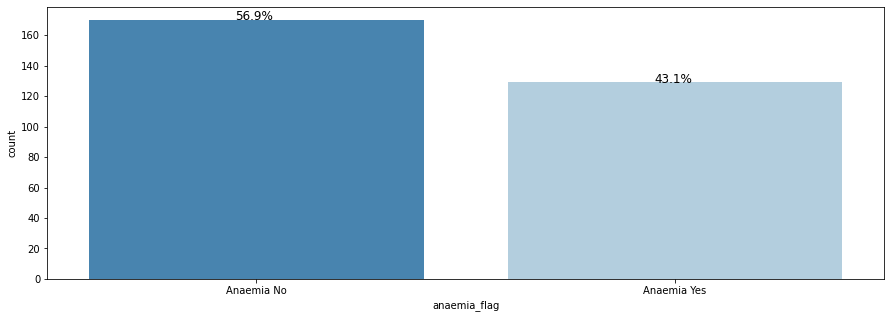

In [14]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='anaemia_flag', data=df, palette='Blues_r');
#plt.title("Anam", weight='bold').set_fontsize('14')
bar_perc(ax,df['anaemia_flag'],font_size=12)

- We can observe that 43.1% of the patients have Anaemia.

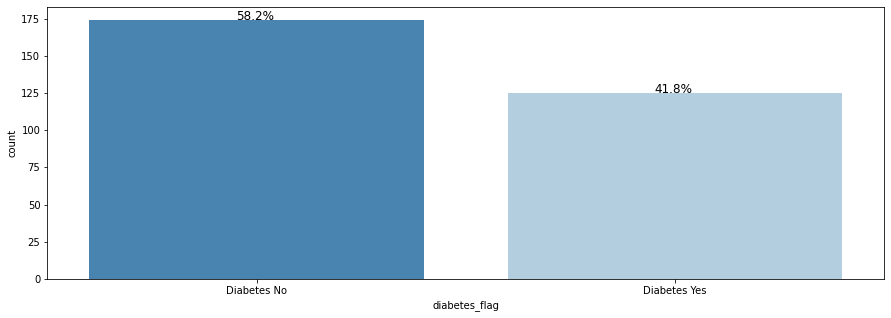

In [15]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='diabetes_flag', data=df, palette='Blues_r');
bar_perc(ax,df['diabetes_flag'],font_size=12)

- 41.8% of the patients have diabetes.

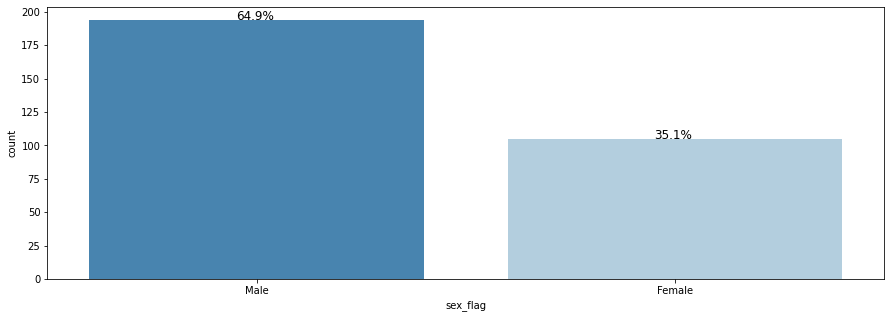

In [16]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='sex_flag', data=df, palette='Blues_r');
bar_perc(ax,df['sex_flag'],font_size=12)

- Majority of the patients are Male.

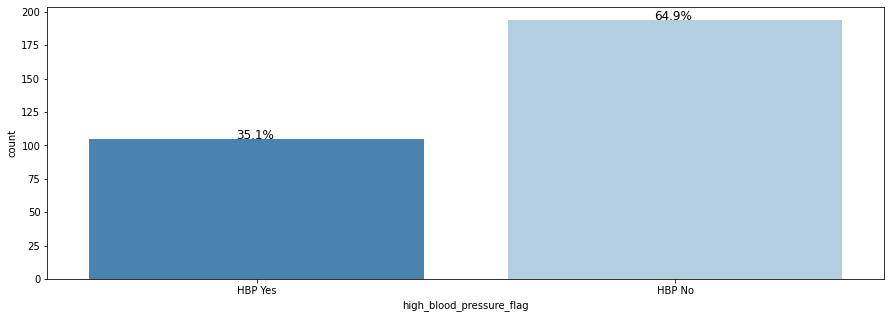

In [17]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='high_blood_pressure_flag', data=df, palette='Blues_r');
bar_perc(ax,df['high_blood_pressure_flag'],font_size=12)

- Only 35.1% of the patients have high blood pressure.

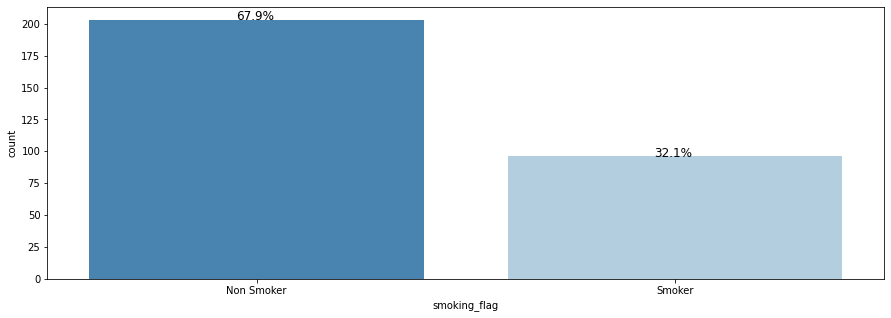

In [18]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='smoking_flag', data=df, palette='Blues_r');
bar_perc(ax,df['smoking_flag'],font_size=12)

- 32.1% of the patients are smokers.

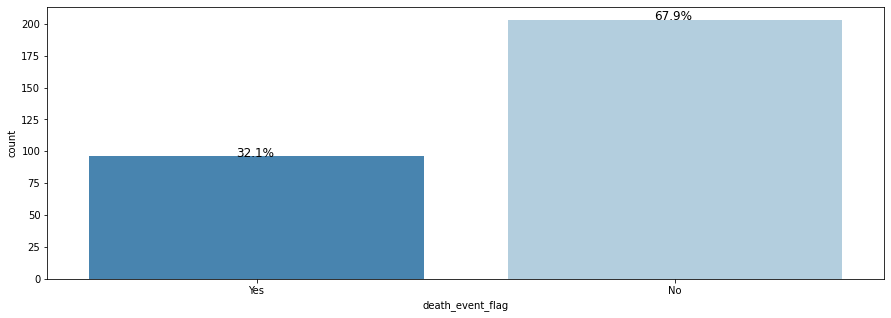

In [19]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='death_event_flag', data=df, palette='Blues_r');
bar_perc(ax,df['death_event_flag'],font_size=12)

- With the other features associated, we can observe that 32.1% of the patients have died.

In [20]:
# understanding numerical features
numeric_columns = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
                     'serum_creatinine', 'serum_sodium', 'time']]

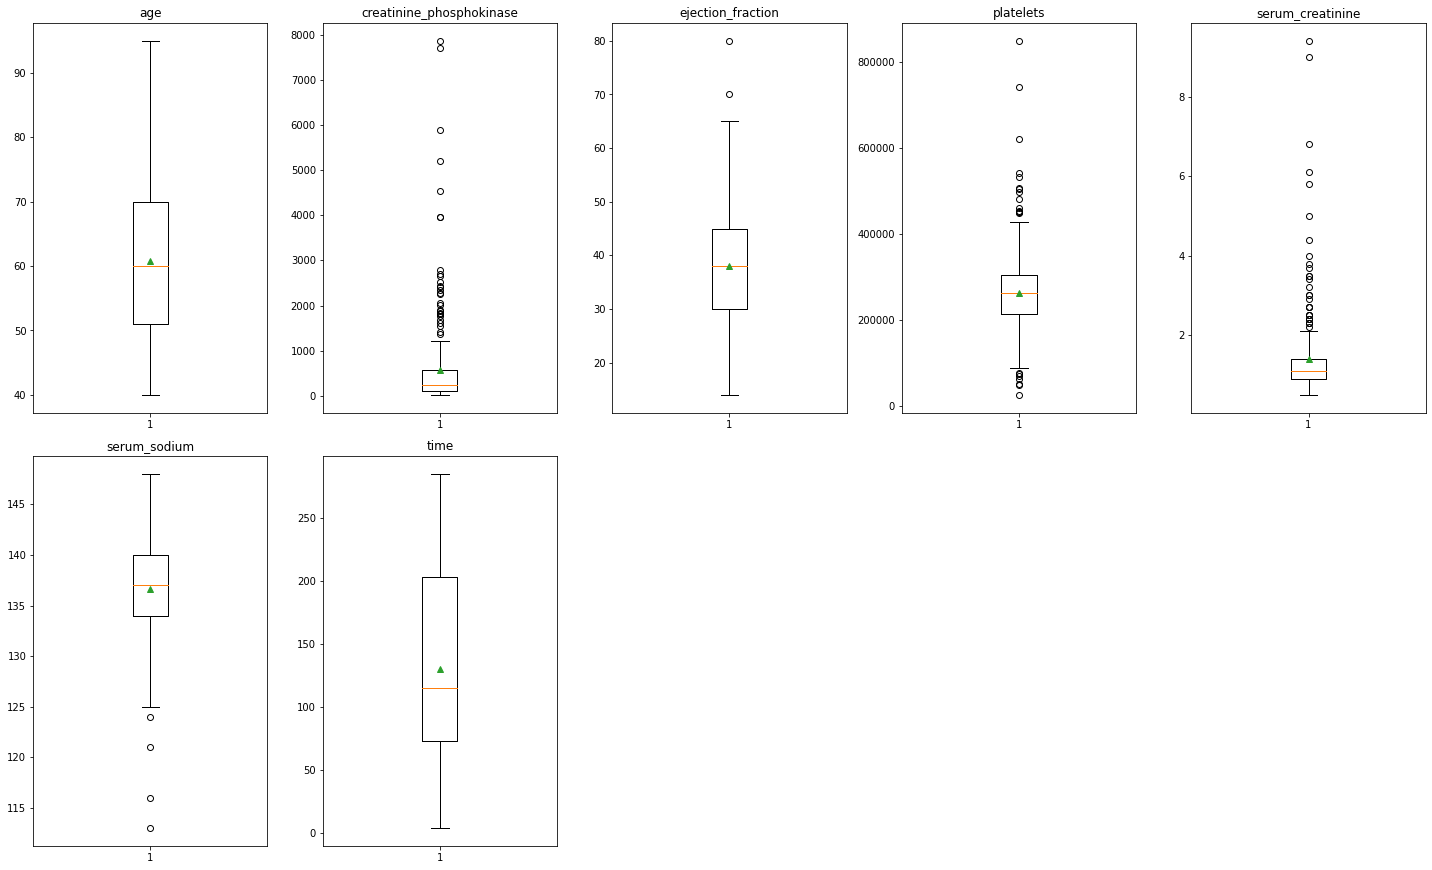

In [21]:
# Lets apply box plot to check the distribution of data.
#numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,5,i+1) # adjust this to have 5 by 5 or 5 by 4.
                     plt.boxplot(df[variable],showmeans=True, whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

- age, ejection_fraciton, serum_sodium, time looks normally distributed with minimum outliers.
- Features such as creatinine_phosphokinase, platelets, serum_creatinine are skewed with max outliers (more variations in higher values) and few min outliers for platelets.


- Based on above summary lets create age bins.

In [22]:
# I included this feature, earlier in the modelling building process i got very less score. after introducing this feature
# there is a marginal increase in the model score.
# I did the same for other feature as well, but it will overfits and performs poortly on test data.
age_bins = [40, 50, 60, 70, 80, 90, 100]

cats = pd.cut(df['age'], age_bins, right=False)

df['age_cats'] = cats

# average life expectancy by death flag grouped by age group
df['avg_age_by_death_flag'] = df.groupby(['age_cats','death_event_flag'])['age'].transform('mean')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,anaemia_flag,diabetes_flag,sex_flag,high_blood_pressure_flag,smoking_flag,death_event_flag,age_cats,avg_age_by_death_flag
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Anaemia No,Diabetes No,Male,HBP Yes,Non Smoker,Yes,"[70, 80)",72.500000
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Anaemia No,Diabetes No,Male,HBP No,Non Smoker,Yes,"[50, 60)",53.650000
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Anaemia No,Diabetes No,Male,HBP No,Smoker,Yes,"[60, 70)",62.839519
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Anaemia Yes,Diabetes No,Male,HBP No,Non Smoker,Yes,"[50, 60)",53.650000
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Anaemia Yes,Diabetes Yes,Female,HBP No,Non Smoker,Yes,"[60, 70)",62.839519


In [23]:
# stacked bar plot to check the proportion of death events.
from math import *
import math

def percentage_stacked_plot(columns_to_plot):
    
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(16, 5 * number_of_rows)) 
    #fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df[column], df['death_event_flag']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['lightblue','red'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Death Event', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=12, loc='center')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

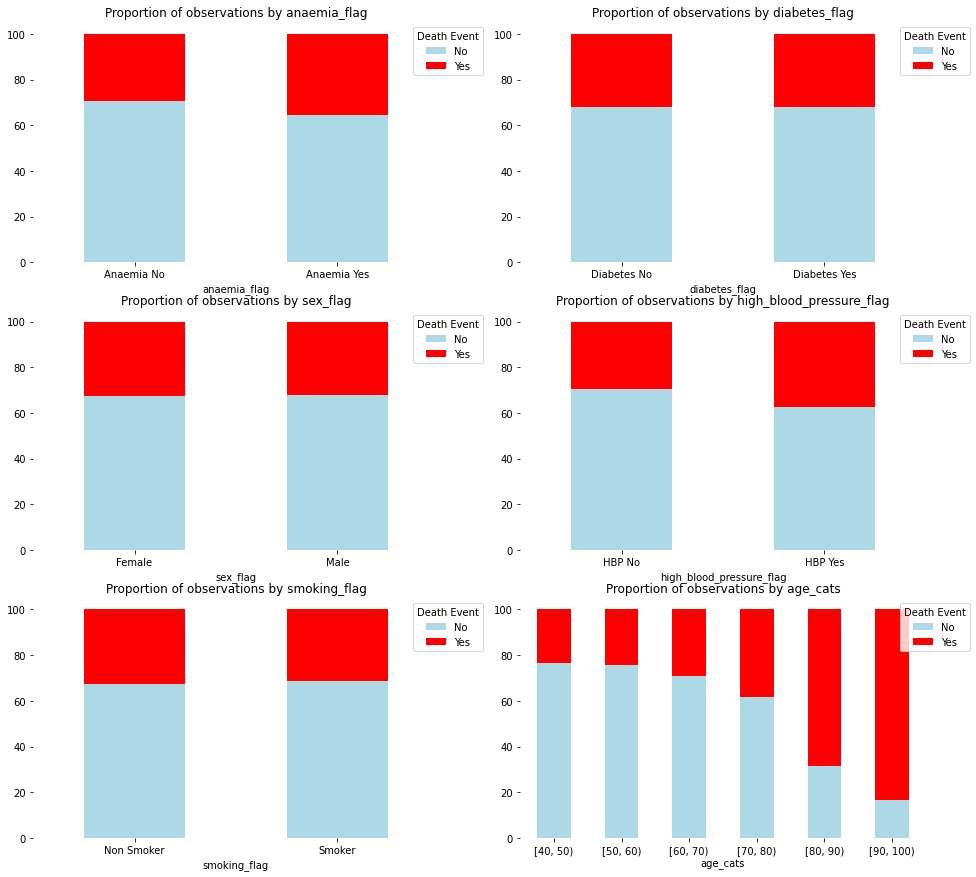

In [24]:
# column names to visualize
df_columns = ['anaemia_flag','diabetes_flag', 'sex_flag','high_blood_pressure_flag', 'smoking_flag', 'age_cats']

# stacked plots
percentage_stacked_plot(df_columns)

- We don't observe any patterns for Death events irrespective of a patient having the above conditions, except we see a marginal increase in death events when the customer has high blood pressure.
- Age group, we can observe the patterns. When the patient gets old, the chances of death also increase.

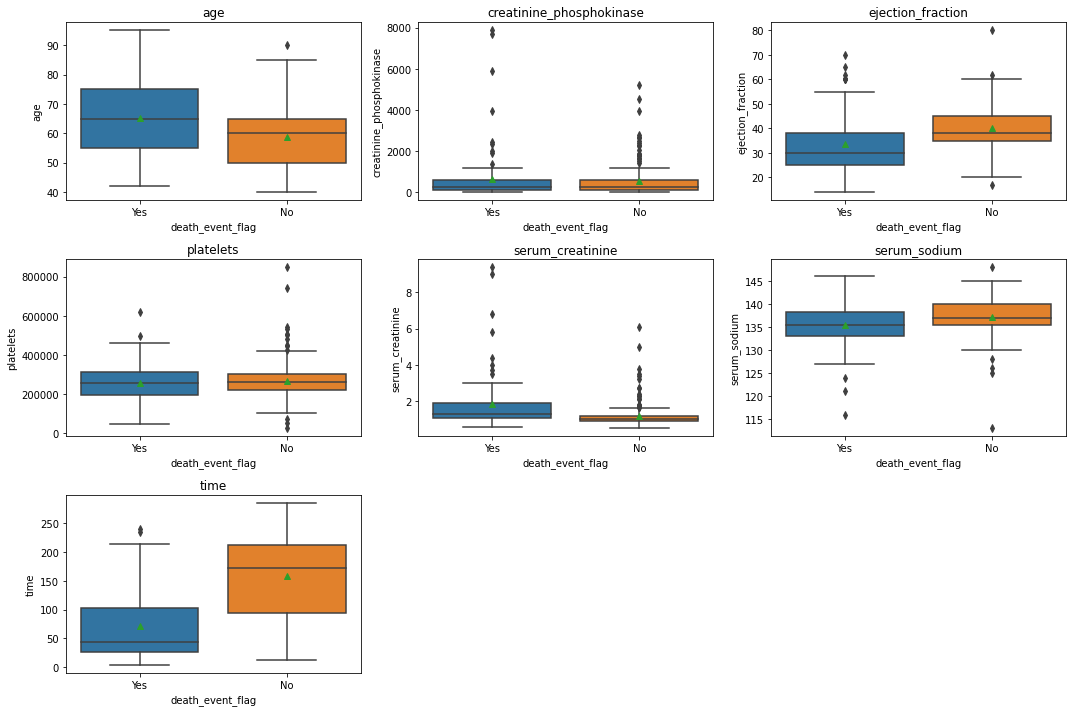

In [25]:
cols = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 
'serum_sodium', 'time']].columns.tolist()
plt.figure(figsize=(15, 10))
for i, variable in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(df["death_event_flag"], df[variable], showmeans=True)
    plt.tight_layout()
    plt.title(variable)
plt.show()

- Age: We can observe higher number of deaths when patients avergae age is around 65. Where as Non death patients average age is around 60. Patient with higher age the age, higher the deaths.
- ejection fraction: Lesser ejection fraction causes more deaths than higher ejection fraction. Higher the better.
- Serum_creatinine: Majority of the death occured when serum_creatinine is higher. 
- Time: We can observe the average time of the pateint when the death flag is Yes is 55. This indicates that lower the time, higher the death.
- creatinine_phosphokinase, platelets and serum sodium does not have much affect irrespective if death event flag is Yes or No.

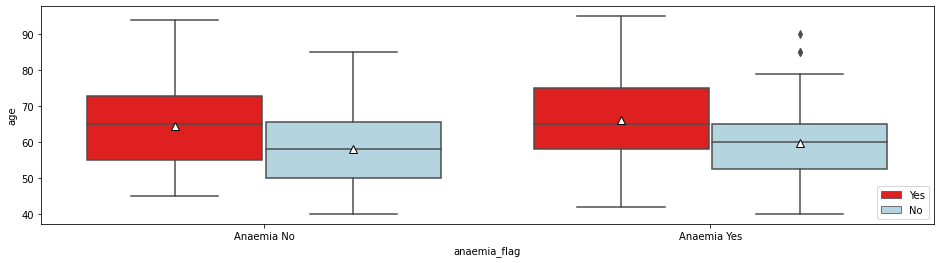

In [26]:
# analyze how the age and anaemia have affects on death event.
color=['red','lightblue']
plt.figure(figsize=(16,4)) # size of the chart

sns.boxplot(x='anaemia_flag',y='age',hue='death_event_flag',data=df,palette=color,showmeans=True,orient='v',
            meanprops={"marker":"^",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"});
plt.legend(loc='lower right');

- We dont see any disparity in anaemia on customer age, proportion of death event remains the same irrespective whether patient has anaemia or not.

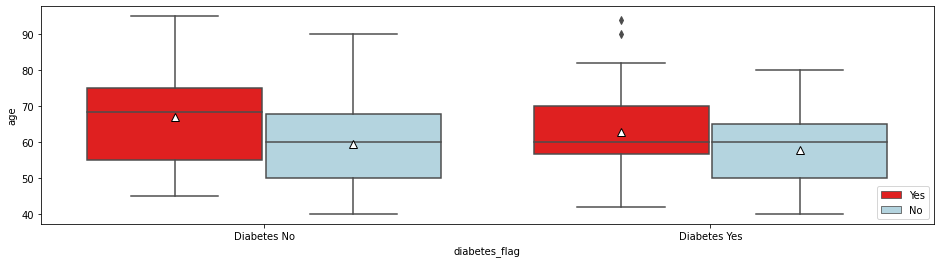

In [27]:
# analyze how the age and diabetes have affects on death event.
color=['red','lightblue']
plt.figure(figsize=(16,4)) # size of the chart

sns.boxplot(x='diabetes_flag',y='age',hue='death_event_flag',data=df,palette=color,showmeans=True,orient='v',
            meanprops={"marker":"^",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"});
plt.legend(loc='lower right');

- We see slightly higher margin of death when the patients get old and does not have diabetes. Seems to be death event does not have any affects on age when patient has diabetes or not.

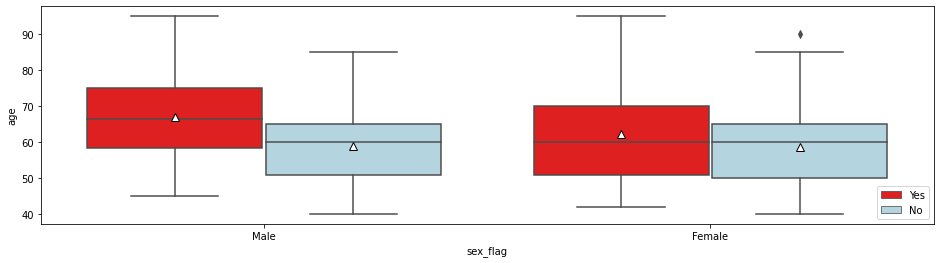

In [28]:
# analyze how the age and diabetes have affects on death event.
color=['red','lightblue']
plt.figure(figsize=(16,4)) # size of the chart

sns.boxplot(x='sex_flag',y='age',hue='death_event_flag',data=df,palette=color,showmeans=True,orient='v',
            meanprops={"marker":"^",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"});
plt.legend(loc='lower right');

- We see slight higher number of deaths for Male when they get old, than female.

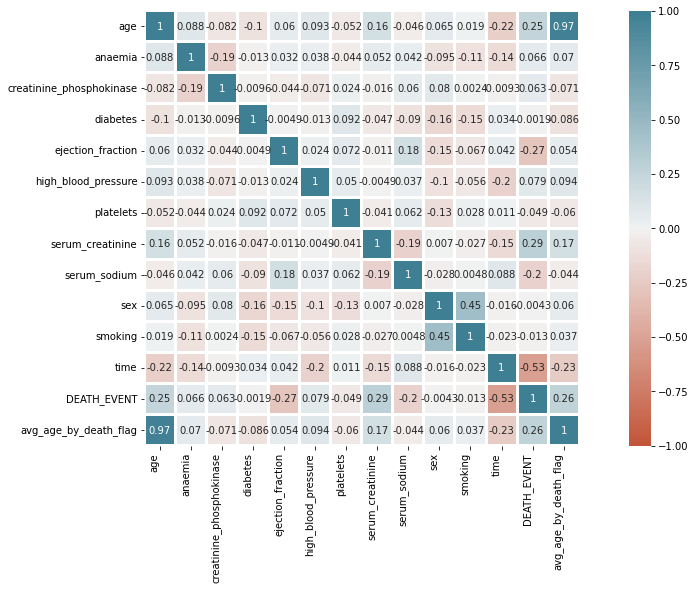

In [29]:
# Apply correlation plot to see if any of the variable are correlated to each other.

plt.figure(figsize=(18,8))
ax = sns.heatmap(df.dropna().corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),
                 linecolor='white', linewidths=2, annot = True,square=True)
ax.set_xticklabels( ax.get_xticklabels(), rotation=90, horizontalalignment='right');

- We can observe that Time variable having significant correlationship by -53% to predictor variable. Otherwise, we do not see any significant correlation among the variables.
- Age and average age by death flag is also having higher correlation, this variable is created by us based on age.

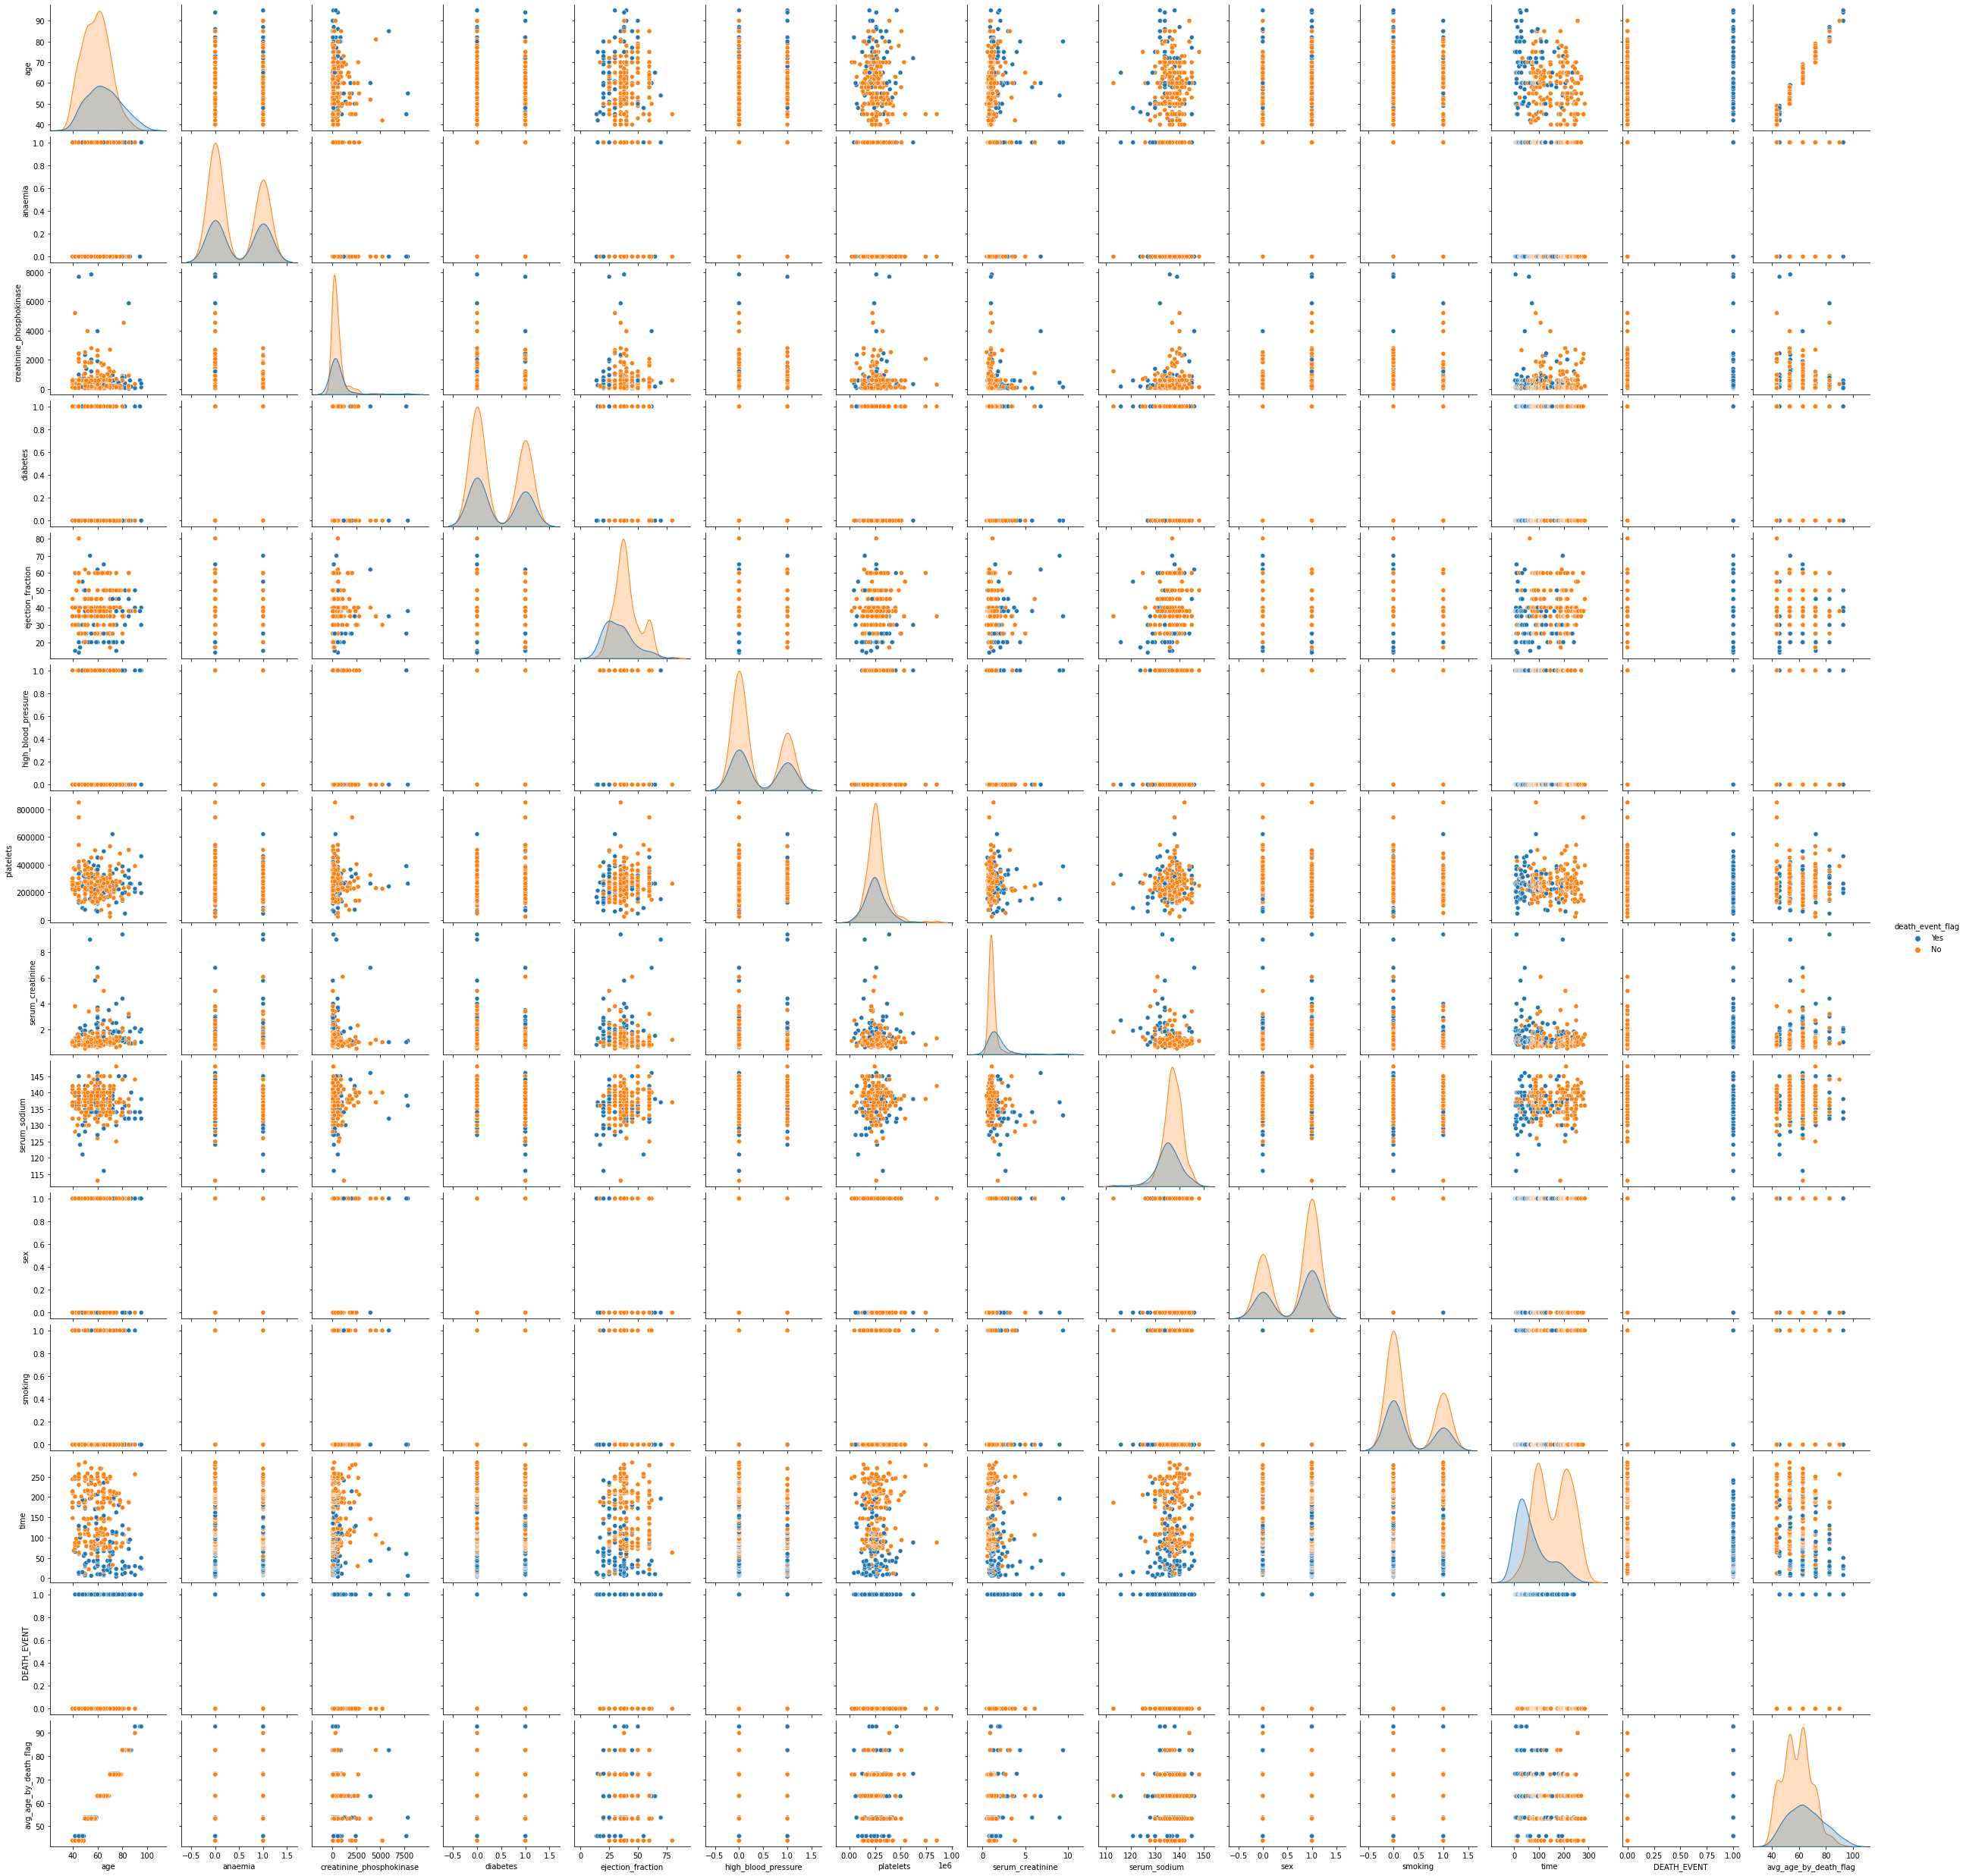

In [30]:
sns.pairplot(df, hue='death_event_flag');

- From the pair plot, we can observe that our data is either bivariate or multivariate.
- We don't observe any linear relationship among the variables. Most of the data points scattered across, which does not show any patterns and variables are independent to each other.

## Process reengineering
### Outlier treatment using Value Clipping

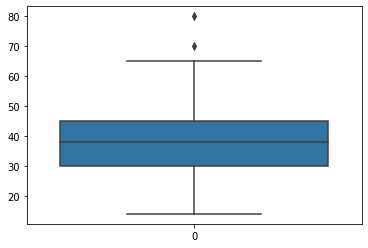

In [31]:
sns.boxplot(data=df['ejection_fraction']);

- Lets apply value clipping for higher values to 65.

In [32]:
df['ejection_fraction'].clip(0, 65, inplace=True)

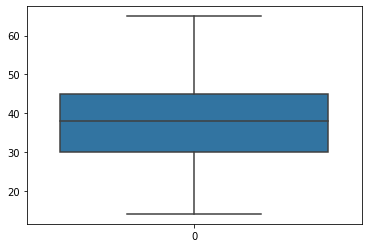

In [33]:
sns.boxplot(data=df['ejection_fraction']);

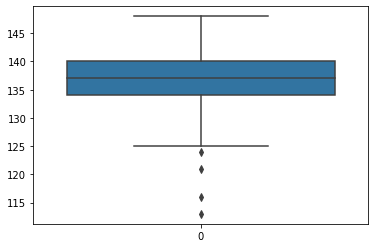

In [34]:
sns.boxplot(data=df['serum_sodium']);

- Lets clip it to 125.

In [35]:
df['serum_sodium'].describe()

count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64

In [36]:
df['serum_sodium'].clip(125, 148, inplace=True)

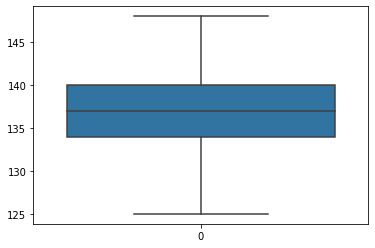

In [37]:
sns.boxplot(data=df['serum_sodium']);

# Evaluation Metrics

* **True Positive:**
     - Reality: Patient survived
     - Model predicted: Patient survived.
     - Outcome: The actual value was positive, and the model predicted a positive value. The model is good.
     
* **True Negative:**
     - Reality: Patient did not survive
     - Model predicted: Patient did not survive.
     - Outcome: The actual value was negative, and the model predicted a negative value. The model is good.
     
* **False Positive:**
     - Reality: Patient DID survive.
     - Model predicted: Patient DID NOT survive.
     - Outcome: Giving the treatment assuming that patient will not survive, in reallity he will survive. This will leads to more complications and also leads to high medicall bills.
* **False Negative:**
     - Reality:  Patient DID NOT survive.
     - Model predicted: Patient DID survive.
     - Outcome: Ignoring the patient without treatment will leads to death.

* **Which Loss is greater**
- Loss of life is a significant loss, not just the life of a patient but also repurational risk, huge penatly from the governing bodies and also loosing trust.
     
* **How to reduce this loss i.e need to reduce False Negatives?**
- Institution wants **RECALL** to be maximized i.e. we need reduce the number of false negatives. Therefore,we use Recall as our metrics.

# Model Building

In [38]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,anaemia_flag,diabetes_flag,sex_flag,high_blood_pressure_flag,smoking_flag,death_event_flag,age_cats,avg_age_by_death_flag
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Anaemia No,Diabetes No,Male,HBP Yes,Non Smoker,Yes,"[70, 80)",72.500000
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Anaemia No,Diabetes No,Male,HBP No,Non Smoker,Yes,"[50, 60)",53.650000
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Anaemia No,Diabetes No,Male,HBP No,Smoker,Yes,"[60, 70)",62.839519
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Anaemia Yes,Diabetes No,Male,HBP No,Non Smoker,Yes,"[50, 60)",53.650000
4,65.0,1,160,1,20,0,327000.00,2.7,125,0,0,8,1,Anaemia Yes,Diabetes Yes,Female,HBP No,Non Smoker,Yes,"[60, 70)",62.839519


- In the earlier section we had created lot of addtional variables to get better insight, now with the model building process, lets drop all those variables.

In [39]:
df1 = df.drop(['anaemia_flag', 'diabetes_flag', 'sex_flag', 'high_blood_pressure_flag',
              'smoking_flag','death_event_flag', 'age_cats'], axis=1)
df1.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,avg_age_by_death_flag
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,72.500000
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,53.650000
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,62.839519
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,53.650000
4,65.0,1,160,1,20,0,327000.00,2.7,125,0,0,8,1,62.839519


In [40]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision

def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)
    
    train_f1 = metrics.f1_score(y_train, pred_train)
    test_f1 = metrics.f1_score(y_test, pred_test)

    score_list.extend((train_acc, test_acc, train_recall, test_recall, train_precision, test_precision, train_f1, test_f1))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print("Precision on training set : ", metrics.precision_score(y_train, pred_train))
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))
        print("f1 on training set : ", metrics.f1_score(y_train, pred_train))
        print("f1 on test set : ", metrics.f1_score(y_test, pred_test))


    return score_list  # returning the list with train and test scores

In [41]:
## Function to create confusion matrix

def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    data_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(8, 5))
    sns.heatmap(data_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")  
    
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    data_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(8, 5))
    sns.heatmap(data_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


In [42]:
# Defining X and y variables

X = df1.drop(['DEATH_EVENT'],axis=1)
y = df1['DEATH_EVENT']

In [43]:
# Splitting data into training and test set:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(239, 13) (60, 13)


In [44]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list

models.append(
    (
        "GNB",
        Pipeline(
            steps=[
                ("scaler", MinMaxScaler()),
                ("gnb", GaussianNB()),
            ]
        ),
    )
)


models.append(
    (
        "SGD",
        Pipeline(
            steps=[
                ("scaler", MinMaxScaler()),
                ("sgd", SGDClassifier(random_state=42,  class_weight='balanced')),
            ]
        ),
    )
)

models.append(
    (
        "SVM",
        Pipeline(
            steps=[
                ("scaler", MinMaxScaler()),
                ("svm", svm.SVC(random_state=42,  class_weight='balanced', probability=True)),
            ]
        ),
    )
)

models.append(
    (
        "Ridge",
        Pipeline(
            steps=[
                ("scaler", MinMaxScaler()),
                ("ridge", RidgeClassifier(random_state=42, max_iter=1000, class_weight='balanced')),
            ]
        ),
    )
)

models.append(
    (
        "LGBM",
        Pipeline(
            steps=[
                ("scaler", MinMaxScaler()),
                ("lgbm", LGBMClassifier(random_state=42,  class_weight='balanced')),
            ]
        ),
    )
)


models.append(
    (
        "XTREE",
        Pipeline(
            steps=[
                ("scaler", MinMaxScaler()),
                ("xtree", ExtraTreesClassifier(random_state=42,  class_weight='balanced', bootstrap=True)),
            ]
        ),
    )
)

models.append(
    (
        "CATB",
        Pipeline(
            steps=[
                ("scaler", MinMaxScaler()),
                ("catb", CatBoostClassifier(random_state=42,  verbose=False)),
            ]
        ),
    )
)

models.append(
    (
        "KNN",
        Pipeline(
            steps=[
                ("scaler", MinMaxScaler()),
                ("knn", KNeighborsClassifier()),
            ]
        ),
    )
)

models.append(
    (
        "LG",
        Pipeline(
            steps=[
                ("scaler", MinMaxScaler()),
                ("lg", LogisticRegression(random_state=42, class_weight='balanced')),
            ]
        ),
    )
)


models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", MinMaxScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=42, class_weight='balanced')),
            ]
        ),
    )
)


models.append(
    (
        "Bagging",
        Pipeline(
            steps=[
                ("scaler", MinMaxScaler()),
                ("bg", BaggingClassifier(random_state=42)),
            ]
        ),
    )
)


models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", MinMaxScaler()),
                ("random_forest", RandomForestClassifier(random_state=42, class_weight='balanced')),
            ]
        ),
    )
)

models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", MinMaxScaler()),
                ("adaboost", AdaBoostClassifier(random_state=42)),
            ]
        ),
    )
)


models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", MinMaxScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=42)),
            ]
        ),
    )
)


models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", MinMaxScaler()),
                ("xgboost", XGBClassifier(random_state=42, eval_metric='logloss')),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=42
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

GNB: 44.416666666666664
SGD: 76.91666666666667
SVM: 70.25
Ridge: 79.25
LGBM: 96.08333333333334
XTREE: 61.16666666666667
CATB: 92.16666666666666
KNN: 24.916666666666668
LG: 77.91666666666667
DTREE: 70.16666666666667
Bagging: 70.08333333333333
RF: 83.25000000000001
ADB: 98.75
GBM: 97.5
XGB: 88.41666666666667


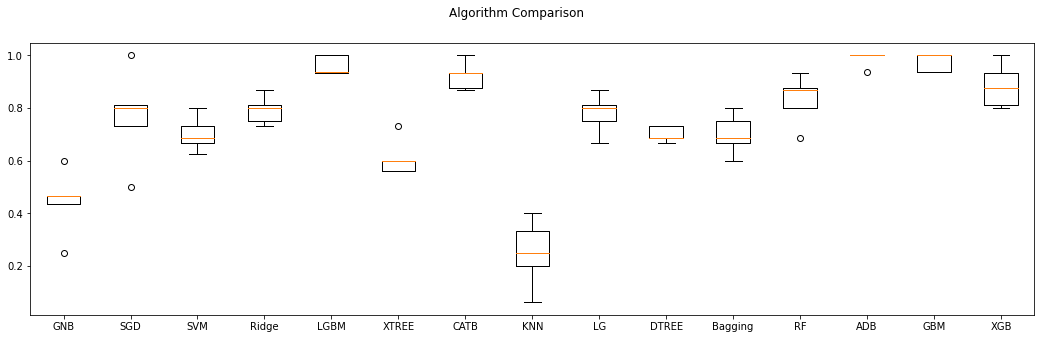

In [45]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(18, 5))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- From the base model comparision we can observe that SGD, LGBM, CATB, ADB and GBM produced good scores. 

In [46]:
# function to create execution time for grid seach and random search models.
import time
def exec_time(start, end):
    diff_time = end - start
    m, s = divmod(diff_time, 60)
    h, m = divmod(m, 60)
    s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
    return f"{h}:{m}:{s}"

In [47]:
import time
start_base = time.time() # to check execution time

# Creating pipeline
pipe = make_pipeline(MinMaxScaler(), SGDClassifier(random_state=42, class_weight='balanced'))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "sgdclassifier__loss": ["hinge", "log", "modified_huber"],
    "sgdclassifier__penalty": ['l1', 'l2','elasticnet'],
    "sgdclassifier__alpha": [0.00001, 0.0001, 0.001, 0.01]    
     
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=10)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

end_base = time.time()
execution_time = exec_time(start_base, end_base)

print("SGD GridSearch execution time is {a}".format(a=execution_time))
print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

SGD GridSearch execution time is 0:0:4
Best Parameters:{'sgdclassifier__alpha': 0.0001, 'sgdclassifier__loss': 'log', 'sgdclassifier__penalty': 'l2'} 
Score: 0.8589285714285715


In [51]:
# Creating new pipeline with best parameters
sgd_gridsearch = make_pipeline(MinMaxScaler(),
                                         SGDClassifier(alpha = 0.0001, loss = 'log', penalty ='l2',
                                                         class_weight='balanced', random_state=42))
# Fit the model on training data
sgd_gridsearch.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('sgdclassifier',
                 SGDClassifier(class_weight='balanced', loss='log',
                               random_state=42))])

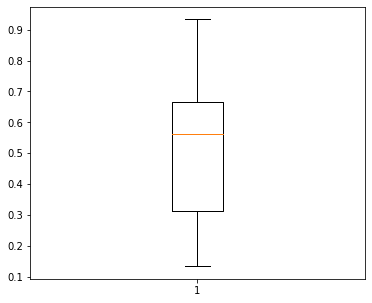

In [52]:
# Let's evaluate the model performance by using KFold and cross_val_score
# K-Folds cross-validator provides dataset indices to split data into train/validation sets. 
# Split dataset into k consecutive stratified folds (without shuffling by default).
#Each fold is then used once as validation while the k - 1 remaining folds form the training set.

scorer='recall'

kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=sgd_gridsearch, X=X_train, y=y_train, scoring=scorer, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(6,5))
plt.boxplot(cv_result_bfr)
plt.show()

- Performance of the training model varies between 0.1 to 0.9

Accuracy on training set :  0.7405857740585774
Accuracy on test set :  0.65
Recall on training set :  0.961038961038961
Recall on test set :  0.7368421052631579
Precision on training set :  0.556390977443609
Precision on test set :  0.4666666666666667
f1 on training set :  0.7047619047619047
f1 on test set :  0.5714285714285714


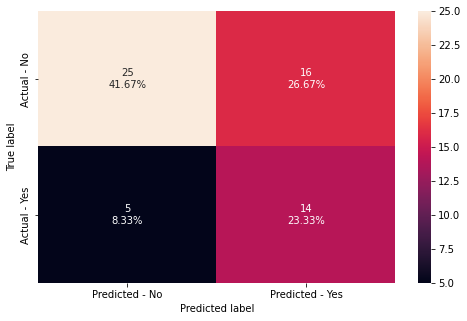

In [53]:
# Calculating different metrics
sgb_gridsearch_score=get_metrics_score(sgd_gridsearch)

# Creating confusion matrix
make_confusion_matrix(sgd_gridsearch, y_test)

- We can observe that model produced good score on training data, however test score is very low comparing to training scores.

In [54]:
import time
start_base = time.time() # to check execution time

# Creating pipeline
pipe = make_pipeline(MinMaxScaler(), svm.SVC(random_state=42, class_weight='balanced', probability=True))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "svc__C": [ 0.1, 1, 10, 100, 1000],
    "svc__kernel": ['rbf','poly','linear', 'sigmoid'],
    "svc__gamma": [0.1, 0.01, 0.001, 0.0001, 0.00001]

}
 
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=10, n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

end_base = time.time()
execution_time = exec_time(start_base, end_base)

print("SVM GridSearch execution time is {a}".format(a=execution_time))
print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

SVM GridSearch execution time is 0:0:50
Best Parameters:{'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel': 'poly'} 
Score: 1.0


In [55]:
# Creating new pipeline with best parameters
svm_gridsearch = make_pipeline(MinMaxScaler(),
                                         svm.SVC(random_state=42, class_weight='balanced', probability=True,
                                            C=1, kernel='poly', gamma=0.01))
# Fit the model on training data
svm_gridsearch.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svc',
                 SVC(C=1, class_weight='balanced', gamma=0.01, kernel='poly',
                     probability=True, random_state=42))])

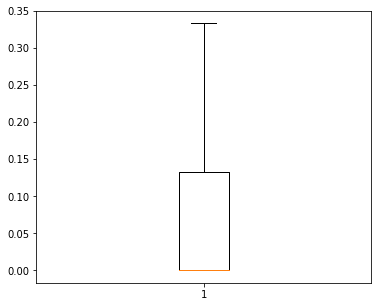

In [56]:
# Let's evaluate the model performance by using KFold and cross_val_score
# K-Folds cross-validator provides dataset indices to split data into train/validation sets. 
# Split dataset into k consecutive stratified folds (without shuffling by default).
#Each fold is then used once as validation while the k - 1 remaining folds form the training set.
scorer='recall'

kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=svm_gridsearch, X=X_train, y=y_train, scoring=scorer, cv=kfold)
#Plotting boxplots for CV scores of model defined abovea
plt.figure(figsize=(6,5))
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on the  training data varies between 0 to 0.35



Accuracy on training set :  0.32217573221757323
Accuracy on test set :  0.31666666666666665
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.32217573221757323
Precision on test set :  0.31666666666666665
f1 on training set :  0.4873417721518987
f1 on test set :  0.4810126582278481


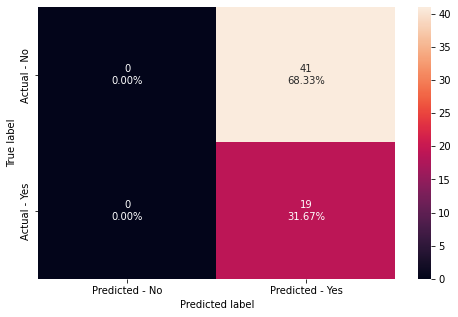

In [57]:
# Calculating different metrics
svm_gridsearch_score=get_metrics_score(svm_gridsearch)

# Creating confusion matrix
make_confusion_matrix(svm_gridsearch, y_test)

- SVM grid search produced very low score and Test score overfits.

In [58]:
import time
start_base = time.time() # to check execution time

# Creating pipeline
pipe = make_pipeline(MinMaxScaler(), RidgeClassifier(random_state=42, class_weight='balanced', max_iter=1000))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "ridgeclassifier__alpha": [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "ridgeclassifier__solver": ['auto', 'lsqr', 'saga']

}
 
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=10, n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

end_base = time.time()
execution_time = exec_time(start_base, end_base)

print("Ridge GridSearch execution time is {a}".format(a=execution_time))
print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Ridge GridSearch execution time is 0:0:5
Best Parameters:{'ridgeclassifier__alpha': 0.01, 'ridgeclassifier__solver': 'auto'} 
Score: 0.8035714285714286


In [59]:
# Creating new pipeline with best parameters
ridge_gridsearch = make_pipeline(MinMaxScaler(),
                                         RidgeClassifier(random_state=42, class_weight='balanced',
                                                         alpha=0.01, solver='auto'))
# Fit the model on training data
ridge_gridsearch.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridgeclassifier',
                 RidgeClassifier(alpha=0.01, class_weight='balanced',
                                 random_state=42))])

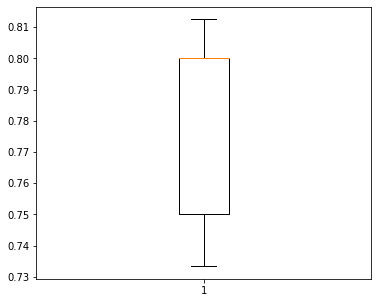

In [60]:
# Let's evaluate the model performance by using KFold and cross_val_score
# K-Folds cross-validator provides dataset indices to split data into train/validation sets. 
# Split dataset into k consecutive stratified folds (without shuffling by default).
#Each fold is then used once as validation while the k - 1 remaining folds form the training set.
scorer='recall'

kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=ridge_gridsearch, X=X_train, y=y_train, scoring=scorer, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(6,5))
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on the training data varies bretween 0.73 to 0.81

Accuracy on training set :  0.8284518828451883
Accuracy on test set :  0.8
Recall on training set :  0.8441558441558441
Recall on test set :  0.5789473684210527
Precision on training set :  0.6914893617021277
Precision on test set :  0.7333333333333333
f1 on training set :  0.760233918128655
f1 on test set :  0.6470588235294117


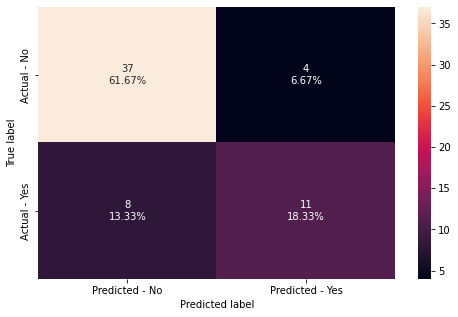

In [61]:
# Calculating different metrics
ridge_gridsearch_score=get_metrics_score(ridge_gridsearch)

# Creating confusion matrix
make_confusion_matrix(ridge_gridsearch, y_test)

- Recall we can observe high dispartiy between training and test score. Otherwise, we can observe pretty good score.

In [62]:
import time # To compare fit times
start = time.time()

# Creating pipeline
pipe = make_pipeline(
    MinMaxScaler(), LGBMClassifier(random_state=42, objective='binary'))

# Parameter grid to pass in GridSearchCV
param_grid = {
     "lgbmclassifier__num_leaves": np.arange(20, 100, 10), 
    "lgbmclassifier__max_depth": [8, 10, 14, 16, 18],
    "lgbmclassifier__learning_rate": [0.01, 0.1, 0.2, 0.4, 0.6],
    "lgbmclassifier__n_estimators": [400, 500, 600, 800],
     #  "lgbmclassifier__min_data_in_leaf": [8, 10, 14, 16, 20]
    
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=10,n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

end_base = time.time()
execution_time = exec_time(start_base, end_base)

print("LGBM Classifier GridSearch execution time is {a}".format(a=execution_time))
print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

LGBM Classifier GridSearch execution time is 0:8:47
Best Parameters:{'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__max_depth': 8, 'lgbmclassifier__n_estimators': 400, 'lgbmclassifier__num_leaves': 20} 
Score: 0.975


In [63]:
# Creating new pipeline with best parameters
lgbm_gridsearch = make_pipeline(MinMaxScaler(),
                                         LGBMClassifier(random_state=42, objective='binary', num_leaves=20,
                                                        max_depth=8, learning_rate=0.1, n_estimators=400))
# Fit the model on training data
lgbm_gridsearch.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('lgbmclassifier',
                 LGBMClassifier(max_depth=8, n_estimators=400, num_leaves=20,
                                objective='binary', random_state=42))])

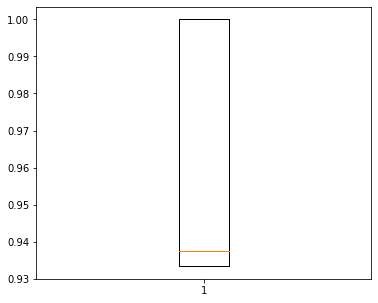

In [64]:
# Let's evaluate the model performance by using KFold and cross_val_score
# K-Folds cross-validator provides dataset indices to split data into train/validation sets. 
# Split dataset into k consecutive stratified folds (without shuffling by default).
#Each fold is then used once as validation while the k - 1 remaining folds form the training set.
scorer='recall'

kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lgbm_gridsearch, X=X_train, y=y_train, scoring=scorer, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(6,5))
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on the training data varies between 0.93 to 1.00

Accuracy on training set :  1.0
Accuracy on test set :  0.9
Recall on training set :  1.0
Recall on test set :  0.7894736842105263
Precision on training set :  1.0
Precision on test set :  0.8823529411764706
f1 on training set :  1.0
f1 on test set :  0.8333333333333333


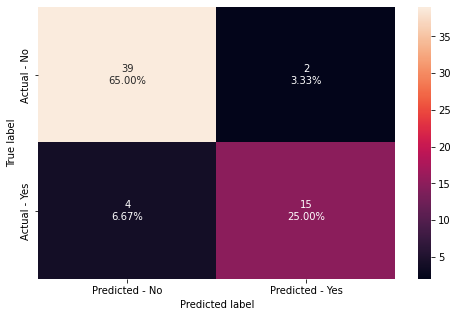

In [65]:
# Calculating different metrics
lgbm_gridsearch_score=get_metrics_score(lgbm_gridsearch)

# Creating confusion matrix
make_confusion_matrix(lgbm_gridsearch, y_test)

- LGBM Gridsearch overfits training data.

### Logistic Regression Grid Search

In [66]:
import time # To compare fit times
start = time.time()

pipe = make_pipeline(MinMaxScaler(), LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))

param_grid = {'logisticregression__penalty': ['l1', 'l2','elasticnet'], 
              "logisticregression__solver":['newton-cg', 'lbfgs', 'liblinear','saga'],  
              'logisticregression__C' : [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
             
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=10, n_jobs=-1)

# Fitting parameters in GridSeachCV

grid_cv.fit(X_train, y_train)

end_base = time.time()
execution_time = exec_time(start_base, end_base)

print("Logistic Regression GridSearch execution time is {a}".format(a=execution_time))
print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Logistic Regression GridSearch execution time is 0:11:24
Best Parameters:{'logisticregression__C': 1e-07, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'} 
Score: 0.8


In [67]:
# Creating new pipeline with best parameters
lg_gridsearch = make_pipeline(MinMaxScaler(),
                                         LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', penalty='l2',
                                                            solver='saga', C=1e-07))
# Fit the model on training data
lg_gridsearch.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(C=1e-07, class_weight='balanced',
                                    max_iter=1000, random_state=42,
                                    solver='saga'))])

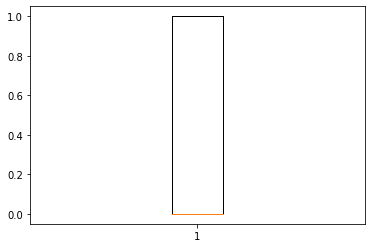

In [68]:
# Let's evaluate the model performance by using KFold and cross_val_score

scoring='recall'

kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)     #Setting number of splits equal to 10
cv_result_bfr=cross_val_score(estimator=lg_gridsearch, X=X_train, y=y_train, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

- Performance of the traning model varies between 0.0 to 1.0

Accuracy on training set :  0.32217573221757323
Accuracy on test set :  0.31666666666666665
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.32217573221757323
Precision on test set :  0.31666666666666665
f1 on training set :  0.4873417721518987
f1 on test set :  0.4810126582278481


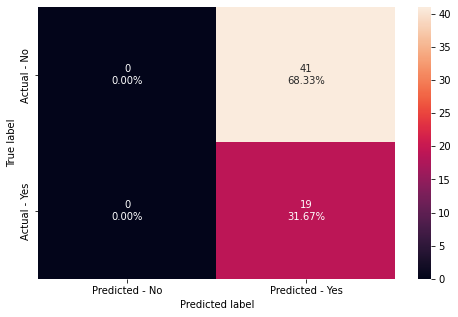

In [69]:
# Calculating different metrics
lg_gridsearch_score=get_metrics_score(lg_gridsearch)

# Creating confusion matrix
make_confusion_matrix(lg_gridsearch, y_test)

- Logistic regression performed poorly.

### Bagging Classifier Grid Search

In [70]:
### import time
start_base = time.time() # to check execution time

# Creating pipeline
pipe = make_pipeline(MinMaxScaler(), BaggingClassifier(random_state=42, bootstrap=True))

param_grid = { "baggingclassifier__max_samples":[0.4, 0.6, 0.8],
              "baggingclassifier__max_features": [0.4, 0.6, 0.8], 
              "baggingclassifier__n_estimators":[100, 150, 200], 
              "baggingclassifier__base_estimator": [
                  DecisionTreeClassifier(max_depth=4, random_state=42),
                  DecisionTreeClassifier(max_depth=6, random_state=42),
                  DecisionTreeClassifier(max_depth=8, random_state=42),
                  ]} 

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=10, n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

end_base = time.time()
execution_time = exec_time(start_base, end_base)

print("Bagging GridSearch execution time is {a}".format(a=execution_time))
print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Bagging GridSearch execution time is 0:3:23
Best Parameters:{'baggingclassifier__base_estimator': DecisionTreeClassifier(max_depth=6, random_state=42), 'baggingclassifier__max_features': 0.6, 'baggingclassifier__max_samples': 0.8, 'baggingclassifier__n_estimators': 150} 
Score: 0.8821428571428571


- After few trials i found out that below parametes are optimal, above parameters overfits.

In [71]:
# Creating new pipeline with best parameters

bagging_gridsearch = make_pipeline(MinMaxScaler(),
                                            BaggingClassifier(DecisionTreeClassifier(random_state=42, 
                                                                                     class_weight='balanced', 
                                                                                     max_depth=6),
                                                               bootstrap=True, max_features=0.6, max_samples= 0.8, n_estimators=150))

# Fit the model on training data
bagging_gridsearch.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                         max_depth=6,
                                                                         random_state=42),
                                   max_features=0.6, max_samples=0.8,
                                   n_estimators=150))])

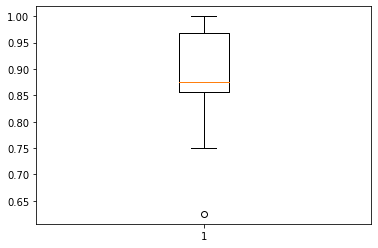

In [72]:
# Let's evaluate the model performance by using KFold and cross_val_score

scoring='recall'

kfold=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=bagging_gridsearch, X=X_train, y=y_train, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

- Performance of the training model varies between 0.65 to 1

Accuracy on training set :  0.99581589958159
Accuracy on test set :  0.8666666666666667
Recall on training set :  0.987012987012987
Recall on test set :  0.6842105263157895
Precision on training set :  1.0
Precision on test set :  0.8666666666666667
f1 on training set :  0.9934640522875817
f1 on test set :  0.7647058823529413


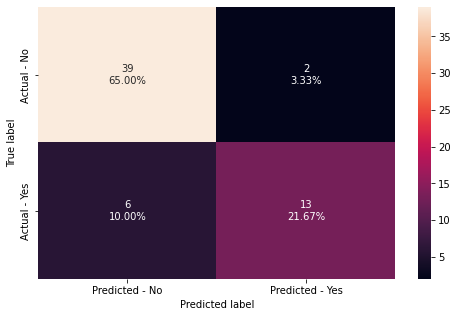

In [73]:
# Calculating different metrics
bagging_gridsearch_score=get_metrics_score(bagging_gridsearch)

# Creating confusion matrix
make_confusion_matrix(bagging_gridsearch, y_test)

- Bagging produced good score, however there is a significant disparity in training and test score for recall.

### Random Forest Gridsearch

In [75]:
import time
start_base = time.time() # to check execution time

# Creating pipeline
pipe = make_pipeline(MinMaxScaler(), RandomForestClassifier(random_state=42, oob_score=True, bootstrap=True,
                                                              class_weight='balanced'))
# Parameter grid to pass in GridSearchCV
param_grid = {"randomforestclassifier__n_estimators": [100, 200, 300],
              #"randomforestclassifier__criterion": ["gini", "entropy"],
              "randomforestclassifier__max_depth": [8, 10, 12, 14], 
              "randomforestclassifier__min_samples_split": [2, 3, 5,],
              "randomforestclassifier__min_samples_leaf": [1, 3, 5],
              #"randomforestclassifier__max_features": [0.6, 0.7, 0.8],
              #"randomforestclassifier__max_features": ['sqrt','log2','auto']
                          
             } 
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=10, n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

end_base = time.time()
execution_time = exec_time(start_base, end_base)

print("RF GridSearch execution time is {a}".format(a=execution_time))
print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

RF GridSearch execution time is 0:6:13
Best Parameters:{'randomforestclassifier__max_depth': 8, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 200} 
Score: 0.8839285714285715


In [76]:
# Creating new pipeline with best parameters

rf_gridsearch = make_pipeline(MinMaxScaler(),
                                            RandomForestClassifier(random_state=42, class_weight='balanced', oob_score=True, bootstrap=True,
                                                                   max_depth=8, min_samples_leaf=5,
                                                                   min_samples_split=2, n_estimators=200))

# Fit the model on training data
rf_gridsearch.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=8,
                                        min_samples_leaf=5, n_estimators=200,
                                        oob_score=True, random_state=42))])

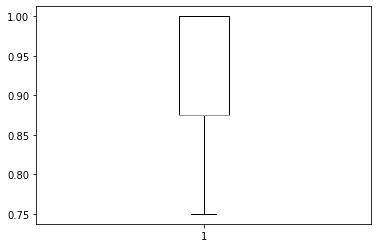

In [77]:
# Let's evaluate the model performance by using KFold and cross_val_score

scoring='recall'

kfold=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=rf_gridsearch, X=X_train, y=y_train, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on the training data varies between 0.75 to 1.00

Accuracy on training set :  0.9623430962343096
Accuracy on test set :  0.85
Recall on training set :  0.961038961038961
Recall on test set :  0.6842105263157895
Precision on training set :  0.925
Precision on test set :  0.8125
f1 on training set :  0.9426751592356688
f1 on test set :  0.742857142857143


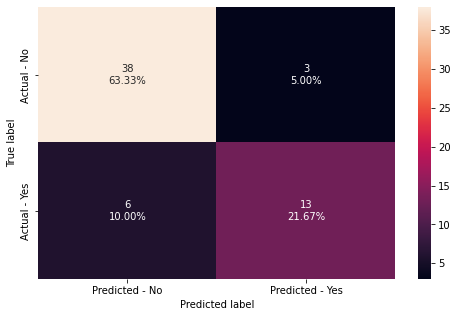

In [78]:
# Calculating different metrics
rf_gridsearch_score=get_metrics_score(rf_gridsearch)

# Creating confusion matrix
make_confusion_matrix(rf_gridsearch, y_test)

- Training score is way higher than test score. Significant disparity.

### AdaBoost GridSearch

In [79]:
import time
start_base = time.time() # to check execution time

# Creating pipeline
pipe = make_pipeline(MinMaxScaler(), AdaBoostClassifier(random_state=42))

param_grid = {"adaboostclassifier__n_estimators":[100,150, 200], 
              "adaboostclassifier__learning_rate":[0.0001, 0.001, 0.01],
              "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=4, random_state=42),
        DecisionTreeClassifier(max_depth=6, random_state=42),
        DecisionTreeClassifier(max_depth=8, random_state=42)]
             
             }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=10, n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

end_base = time.time()
execution_time = exec_time(start_base, end_base)

print("AdBoost GridSearch execution time is {a}".format(a=execution_time))
print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

AdBoost GridSearch execution time is 0:0:41
Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=4, random_state=42), 'adaboostclassifier__learning_rate': 0.01, 'adaboostclassifier__n_estimators': 100} 
Score: 0.8339285714285716


- After few trials i found out that the below is the best parameters to use, instead of above.

In [80]:
# Creating new pipeline with best parameters

adb_gridsearch = make_pipeline(MinMaxScaler(),AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4, random_state=42),
                       learning_rate=0.001, n_estimators=100))

# Fit the model on training data
adb_gridsearch.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                                          random_state=42),
                                    learning_rate=0.001, n_estimators=100))])

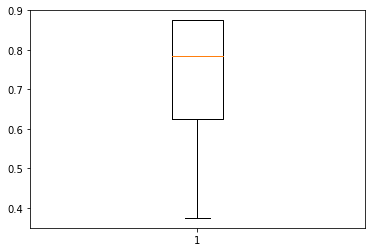

In [81]:
# Let's evaluate the model performance by using KFold and cross_val_score

scoring='recall'

kfold=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=adb_gridsearch, X=X_train, y=y_train, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on the training data varies between 0.4 to 0.9

Accuracy on training set :  0.9832635983263598
Accuracy on test set :  0.9
Recall on training set :  0.961038961038961
Recall on test set :  0.9473684210526315
Precision on training set :  0.9866666666666667
Precision on test set :  0.782608695652174
f1 on training set :  0.9736842105263157
f1 on test set :  0.8571428571428571


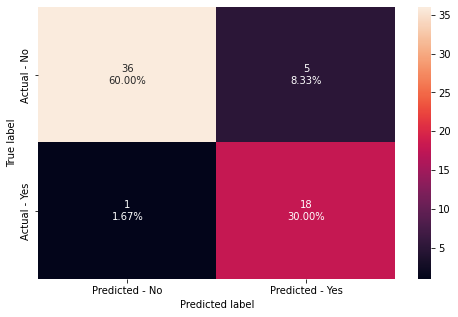

In [82]:
# Calculating different metrics
adb_gridsearch_score=get_metrics_score(adb_gridsearch)

# Creating confusion matrix
make_confusion_matrix(adb_gridsearch, y_test)

- AdaBoost Gridsearch produced good model score, with higher accuracy, recall, precision and f1.

### GradientBoost GridSearch

In [83]:
import time
start_base = time.time() # to check execution time

# Creating pipeline
pipe = make_pipeline(MinMaxScaler(), GradientBoostingClassifier(random_state=42))

param_grid = {"gradientboostingclassifier__max_depth":[4, 6, 8], 
              #"gradientboostingclassifier__max_features": [0.4, 0.6, 0.7],
              "gradientboostingclassifier__min_samples_split": [2, 4, 7],
              "gradientboostingclassifier__min_samples_leaf": [1, 3, 5], 
              "gradientboostingclassifier__learning_rate":[0.0001, 0.001, 0.01, 0.05],
              "gradientboostingclassifier__n_estimators":[50, 75, 100, 150 ]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=10, n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

end_base = time.time()
execution_time = exec_time(start_base, end_base)

print("GradientBoost GridSearch execution time is {a}".format(a=execution_time))
print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

GradientBoost GridSearch execution time is 0:8:31
Best Parameters:{'gradientboostingclassifier__learning_rate': 0.05, 'gradientboostingclassifier__max_depth': 4, 'gradientboostingclassifier__min_samples_leaf': 3, 'gradientboostingclassifier__min_samples_split': 7, 'gradientboostingclassifier__n_estimators': 150} 
Score: 0.975


In [95]:
# Creating new pipeline with best parameters

gdb_gridsearch = make_pipeline(MinMaxScaler(),GradientBoostingClassifier(random_state=42, learning_rate=0.05, n_estimators=150, 
                                                                         min_samples_split=7, min_samples_leaf=3, max_depth=4, max_features=0.8))

# Fit the model on training data
gdb_gridsearch.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=4,
                                            max_features=0.8,
                                            min_samples_leaf=3,
                                            min_samples_split=7,
                                            n_estimators=150,
                                            random_state=42))])

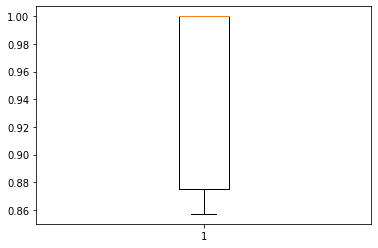

In [85]:
# Let's evaluate the model performance by using KFold and cross_val_score

scoring='recall'

kfold=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=gdb_gridsearch, X=X_train, y=y_train, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on the training data varies between 0.86 to 1.00

Accuracy on training set :  1.0
Accuracy on test set :  0.9833333333333333
Recall on training set :  1.0
Recall on test set :  0.9473684210526315
Precision on training set :  1.0
Precision on test set :  1.0
f1 on training set :  1.0
f1 on test set :  0.972972972972973


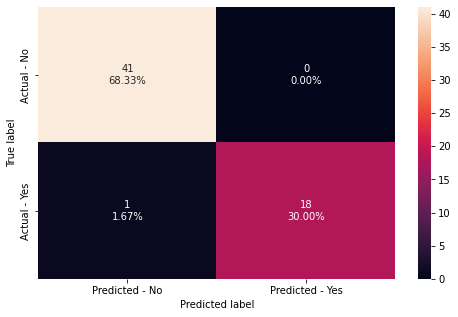

In [96]:
# Calculating different metrics
gdb_gridsearch_score=get_metrics_score(gdb_gridsearch)

# Creating confusion matrix
make_confusion_matrix(gdb_gridsearch, y_test)

- Using the best above parameters overfits, however using the tuned parameters produces low test score.

### XGBoost GridSearch

In [97]:
import time
start_base = time.time() # to check execution time

# Creating pipeline
pipe = make_pipeline(
    MinMaxScaler(), XGBClassifier(random_state=42, eval_metric="logloss", use_label_encoder=False))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "xgbclassifier__max_depth": [6, 8 ,12], 
    "xgbclassifier__n_estimators": np.arange(50, 150, 50), 
    #"xgbclassifier__min_child_weight": [1, 3, 5], 
    "xgbclassifier__learning_rate": [0.1, 0.2, 0.6, 0.7] 
    
    #"xgbclassifier__scale_pos_weight": [2, 5, 10],
    #"xgbclassifier__subsample": [0.7, 0.8, 0.9]
    #"xgbclassifier__colsample_bytree: [0.5, 0.7, 0.8]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

end_base = time.time()
execution_time = exec_time(start_base, end_base)

print("XGBoost GridSearch execution time is {a}".format(a=execution_time))
print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

XGBoost GridSearch execution time is 0:0:4
Best Parameters:{'xgbclassifier__learning_rate': 0.6, 'xgbclassifier__max_depth': 8, 'xgbclassifier__n_estimators': 100} 
Score: 0.8808333333333334


In [98]:
# Creating new pipeline with best parameters

xgboost_gridsearch = make_pipeline(
    MinMaxScaler(),
    XGBClassifier(random_state=1, eval_metric="logloss", use_label_encoder=False,  learning_rate= 0.6, max_depth= 8, n_estimators=100))

# Fit the model on training data
xgboost_gridsearch.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('xgbclassifier',
                 XGBClassifier(eval_metric='logloss', learning_rate=0.6,
                               max_depth=8, random_state=1,
                               use_label_encoder=False))])

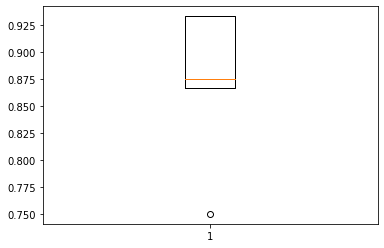

In [99]:
# Let's evaluate the model performance by using KFold and cross_val_score

scoring='recall'

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=xgboost_gridsearch, X=X_train, y=y_train, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on the training data varies between 0.750 to 0.925

Accuracy on training set :  1.0
Accuracy on test set :  0.8833333333333333
Recall on training set :  1.0
Recall on test set :  0.7894736842105263
Precision on training set :  1.0
Precision on test set :  0.8333333333333334
f1 on training set :  1.0
f1 on test set :  0.8108108108108109


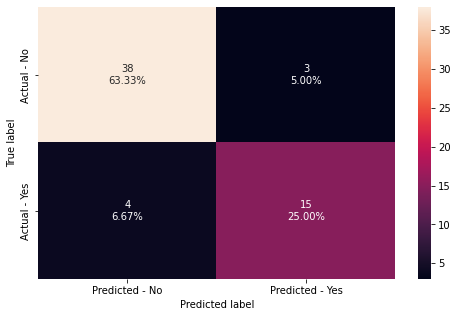

In [100]:
# Calculating different metrics
xgb_gridsearch_score = get_metrics_score(xgboost_gridsearch)

# Creating confusion matrix
make_confusion_matrix(xgboost_gridsearch, y_test)

- We can observe significant dispartiy between training and test score.

### CatBoost GridSearch

In [101]:
import time
start_base = time.time() # to check execution time

# Creating pipeline
pipe = make_pipeline(
    MinMaxScaler(), CatBoostClassifier(random_state=42, verbose=False))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "catboostclassifier__depth": [8, 10, 12], 
    "catboostclassifier__l2_leaf_reg": [1, 3, 5], 
    "catboostclassifier__learning_rate": [0.01, 0.05, 0.1, 0.4, 0.6, 0.7 ],
    "catboostclassifier__iterations": [25, 50]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5,n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

end_base = time.time()
execution_time = exec_time(start_base, end_base)

print("CatBoost GridSearch execution time is {a}".format(a=execution_time))
print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

CatBoost GridSearch execution time is 0:3:55
Best Parameters:{'catboostclassifier__depth': 8, 'catboostclassifier__iterations': 25, 'catboostclassifier__l2_leaf_reg': 5, 'catboostclassifier__learning_rate': 0.7} 
Score: 0.96


In [102]:
# Creating new pipeline with best parameters

catboost_gridsearch = make_pipeline(
    MinMaxScaler(),
    CatBoostClassifier(random_state=42, verbose=False, max_depth= 8, iterations=25, l2_leaf_reg=5,
                  learning_rate=0.7))

# Fit the model on training data
catboost_gridsearch.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x7fda475066d0>)])

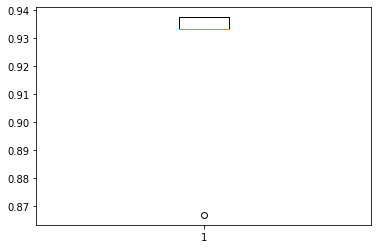

In [103]:
# Let's evaluate the model performance by using KFold and cross_val_score

scoring='recall'

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=catboost_gridsearch, X=X_train, y=y_train, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on training data varies between 0.87 to 0.94

Accuracy on training set :  0.99581589958159
Accuracy on test set :  0.8666666666666667
Recall on training set :  0.987012987012987
Recall on test set :  0.7368421052631579
Precision on training set :  1.0
Precision on test set :  0.8235294117647058
f1 on training set :  0.9934640522875817
f1 on test set :  0.7777777777777778


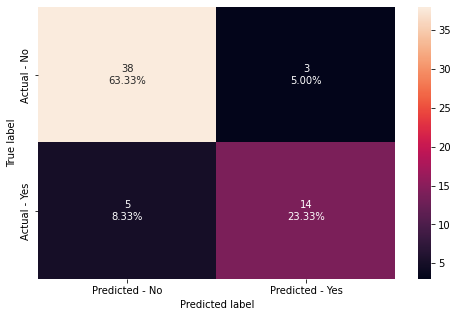

In [104]:
# Calculating different metrics
catb_gridsearch_score = get_metrics_score(catboost_gridsearch)

# Creating confusion matrix
make_confusion_matrix(catboost_gridsearch, y_test)

- Significant disparity between training and test score.

## OPTUNA

In [107]:
import optuna 
from optuna import Trial, visualization
from optuna.samplers import TPESampler
scorer = metrics.make_scorer(metrics.recall_score)

In [108]:
def sgd_objective(trial: Trial,X,y) -> float:
    
    param = {
        'loss':trial.suggest_categorical("loss", ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']),
        'penalty':trial.suggest_categorical("penalty",['l1', 'l2','elasticnet']),
        'alpha':trial.suggest_uniform("alpha",0.000001, 1)
    }
    
    model = SGDClassifier(random_state = 42, class_weight='balanced', n_jobs=-1, **param)
    
    return cross_val_score(model, X, y, scoring=scorer, cv=kfold).mean()

In [119]:
optuna.logging.disable_default_handler() # to suppress the print of n_trails
sgd_study = optuna.create_study(direction='maximize', sampler=TPESampler())
sgd_study.optimize(lambda trial : sgd_objective(trial, X, y), n_trials= 100)


In [120]:
print('Best trial: score {},\nparams {}'.format(sgd_study.best_trial.value, sgd_study.best_trial.params))

Best trial: score 1.0,
params {'loss': 'modified_huber', 'penalty': 'l1', 'alpha': 0.7875216364767395}


- Using above Loss : 'modified_huber' will produce 0 training and test score for recall, precision and f1, therefore, i have used squared_hinge as loss parameter

In [125]:
# Creating new pipeline with best parameters
sgd_optuna= make_pipeline(
    MinMaxScaler(),
    SGDClassifier(random_state=42, class_weight = 'balanced',loss='squared_hinge', penalty='l1', alpha=0.786))

# Fit the model on training data
sgd_optuna.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.786, class_weight='balanced',
                               loss='squared_hinge', penalty='l1',
                               random_state=42))])

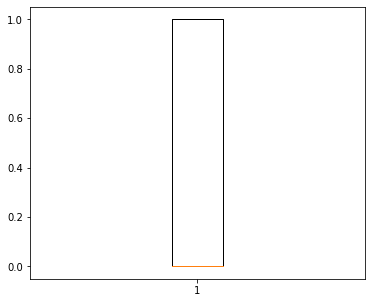

In [122]:
# Let's evaluate the model performance by using KFold and cross_val_score
# K-Folds cross-validator provides dataset indices to split data into train/validation sets. 
# Split dataset into k consecutive stratified folds (without shuffling by default).
#Each fold is then used once as validation while the k - 1 remaining folds form the training set.
scorer='recall'

kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=sgd_optuna, X=X_train, y=y_train, scoring=scorer, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(6,5))
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on the training data varies between 0.00 to 1.0

Accuracy on training set :  0.6443514644351465
Accuracy on test set :  0.6666666666666666
Recall on training set :  0.8441558441558441
Recall on test set :  0.7894736842105263
Precision on training set :  0.47101449275362317
Precision on test set :  0.4838709677419355
f1 on training set :  0.6046511627906977
f1 on test set :  0.6


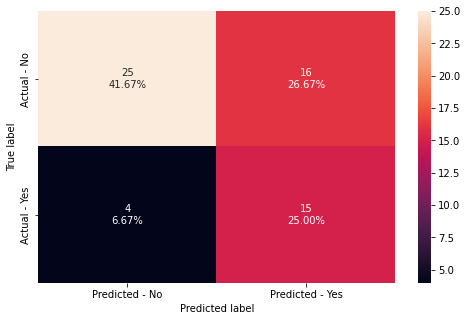

In [126]:
# Calculating different metrics
sgd_optuna_score = get_metrics_score(sgd_optuna)

# Creating confusion matrixa
make_confusion_matrix(sgd_optuna, y_test)

In [127]:
def rf_objective(trial: Trial,X,y) -> float:
    
    param = {
        'criterion':trial.suggest_categorical("criterion", ['gini','entropy']),
        'n_estimators':trial.suggest_int("n_estimators", 50, 500),
        'max_depth':trial.suggest_int("max_depth", 4, 12),
        'min_samples_split':trial.suggest_int("min_samples_split", 2, 8),
        'min_samples_leaf':trial.suggest_int("min_samples_leaf", 1, 8),
        'max_features':trial.suggest_categorical("max_features", ['sqrt','log2','auto'])
        }
    
    model = RandomForestClassifier(random_state = 42, class_weight='balanced', n_jobs=-1, **param)
    
    return cross_val_score(model, X, y, scoring=scorer, cv=kfold).mean()

In [128]:
optuna.logging.disable_default_handler() # to suppress the print of n_trails
rf_study = optuna.create_study(direction='maximize', sampler=TPESampler())
rf_study.optimize(lambda trial : rf_objective(trial, X, y), n_trials= 100)

In [129]:
print('Best trial: score {},\nparams {}'.format(rf_study.best_trial.value, rf_study.best_trial.params))

Best trial: score 0.8542105263157895,
params {'criterion': 'entropy', 'n_estimators': 123, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}


In [130]:
# Creating new pipeline with best parameters
rf_optuna= make_pipeline(
    MinMaxScaler(),
    RandomForestClassifier(random_state=42, class_weight = 'balanced', criterion='entropy', n_estimators=123, max_depth=7, min_samples_split=5,
                          min_samples_leaf=4, max_features='sqrt'))

# Fit the model on training data
rf_optuna.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=7,
                                        max_features='sqrt', min_samples_leaf=4,
                                        min_samples_split=5, n_estimators=123,
                                        random_state=42))])

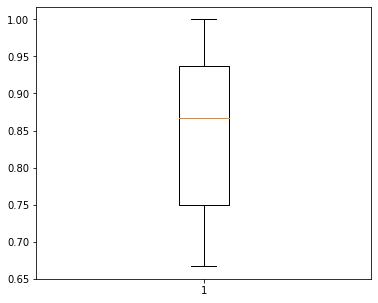

In [131]:
# Let's evaluate the model performance by using KFold and cross_val_score
# K-Folds cross-validator provides dataset indices to split data into train/validation sets. 
# Split dataset into k consecutive stratified folds (without shuffling by default).
#Each fold is then used once as validation while the k - 1 remaining folds form the training set.
scorer='recall'

kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=rf_optuna, X=X_train, y=y_train, scoring=scorer, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(6,5))
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on the training data varies between 0.65 to 1.00

Accuracy on training set :  0.9790794979079498
Accuracy on test set :  0.8666666666666667
Recall on training set :  0.987012987012987
Recall on test set :  0.7368421052631579
Precision on training set :  0.95
Precision on test set :  0.8235294117647058
f1 on training set :  0.9681528662420381
f1 on test set :  0.7777777777777778


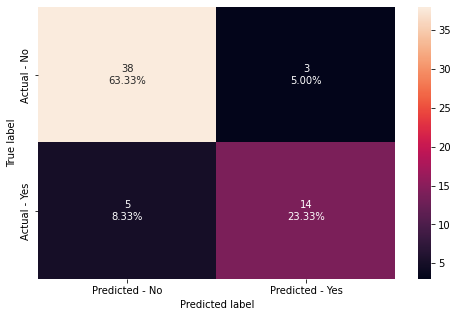

In [132]:
# Calculating different metrics
rf_optuna_score = get_metrics_score(rf_optuna)

# Creating confusion matrix
make_confusion_matrix(rf_optuna, y_test)

- We can observe significant disparity between training and test score.

### OPTUNA Bagging Classifier

In [133]:
def bg_objective(trial: Trial,X,y) -> float:
    
    param = {
        'max_features':trial.suggest_uniform('max_features', 0.2, 0.8),
        'max_samples':trial.suggest_uniform('max_samples', 0.2, 0.8),
        "n_estimators" : trial.suggest_int('n_estimators', 100, 500)
    }
    
    model = BaggingClassifier(random_state = 42, bootstrap=True, n_jobs=-1, **param)
    
    return cross_val_score(model, X, y, scoring=scorer, cv=kfold).mean()

In [134]:
optuna.logging.disable_default_handler() # to suppress the print of n_trails
bg_study = optuna.create_study(direction='maximize', sampler=TPESampler())
bg_study.optimize(lambda trial : bg_objective(trial, X, y), n_trials= 100)

In [135]:
print('Best trial: score {},\nparams {}'.format(bg_study.best_trial.value, bg_study.best_trial.params))

Best trial: score 0.8868421052631579,
params {'max_features': 0.4604033613694539, 'max_samples': 0.7994638282105712, 'n_estimators': 364}


In [136]:
# Creating new pipeline with best parameters
bg_optuna= make_pipeline(
    MinMaxScaler(),
    BaggingClassifier(random_state=42,bootstrap=True, max_features=0.46, max_samples=0.80, n_estimators=364))

# Fit the model on training data
bg_optuna.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.46, max_samples=0.8,
                                   n_estimators=364, random_state=42))])

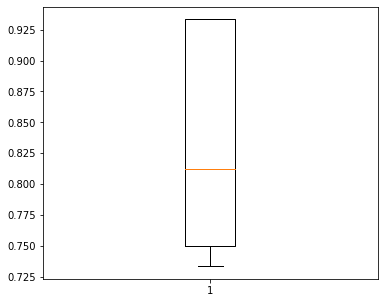

In [137]:
# Let's evaluate the model performance by using KFold and cross_val_score
# K-Folds cross-validator provides dataset indices to split data into train/validation sets. 
# Split dataset into k consecutive stratified folds (without shuffling by default).
#Each fold is then used once as validation while the k - 1 remaining folds form the training set.
scorer='recall'

kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=bg_optuna, X=X_train, y=y_train, scoring=scorer, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(6,5))
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on the training data varies between 0.725 to 0.925

Accuracy on training set :  1.0
Accuracy on test set :  0.9333333333333333
Recall on training set :  1.0
Recall on test set :  0.8421052631578947
Precision on training set :  1.0
Precision on test set :  0.9411764705882353
f1 on training set :  1.0
f1 on test set :  0.8888888888888888


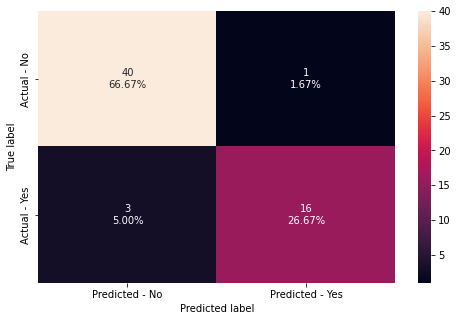

In [138]:
# Calculating different metrics
bg_optuna_score = get_metrics_score(bg_optuna)

# Creating confusion matrix
make_confusion_matrix(bg_optuna, y_test)

- This model overfits the training data

### OPTUNA AdaBoost

In [139]:
def adb_objective(trial: Trial,X,y) -> float:
    
    param = {
        'n_estimators':trial.suggest_int("n_estimators", 50, 500),
        'learning_rate':trial.suggest_float('learning_rate',1e-7,0.3, log=True)
     
        }
    
    model = AdaBoostClassifier(random_state = 42, **param)
    
    return cross_val_score(model, X, y, scoring=scorer, cv=kfold).mean()


In [140]:
optuna.logging.disable_default_handler() # to suppress the print of n_trails
adb_study = optuna.create_study(direction='maximize', sampler=TPESampler())
adb_study.optimize(lambda trial : adb_objective(trial, X, y), n_trials= 100)

In [141]:
print('Best trial: score {},\nparams {}'.format(adb_study.best_trial.value, adb_study.best_trial.params))

Best trial: score 0.99,
params {'n_estimators': 484, 'learning_rate': 0.24920226970176831}


In [142]:
# Creating new pipeline with best parameters

adaboost_optuna = make_pipeline(
    MinMaxScaler(),
    AdaBoostClassifier(n_estimators=484, learning_rate=0.25))

# Fit the model on training data
adaboost_optuna.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(learning_rate=0.25, n_estimators=484))])

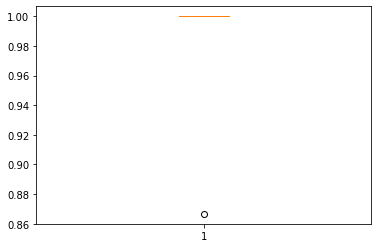

In [143]:
# Let's evaluate the model performance by using KFold and cross_val_score

scoring='recall'

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=adaboost_optuna, X=X_train, y=y_train, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on the training data varies between 0.86 to 1

Accuracy on training set :  1.0
Accuracy on test set :  1.0
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  1.0
f1 on training set :  1.0
f1 on test set :  1.0


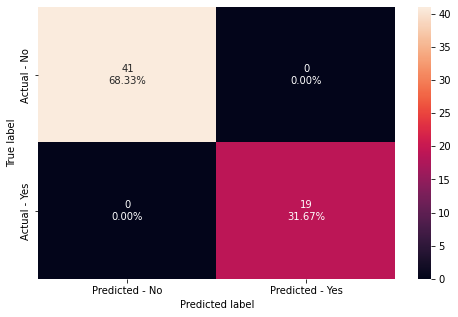

In [144]:
# Calculating different metrics
adaboost_optuna_score = get_metrics_score(adaboost_optuna)

# Creating confusion matrix
make_confusion_matrix(adaboost_optuna, y_test)

- Model overfits.

### OPTUAN GradientBoost

In [145]:
def gdb_objective(trial: Trial,X,y) -> float:
    
    param = {
        'learning_rate':trial.suggest_float('learning_rate',1e-7,0.3, log=True),
        'n_estimators':trial.suggest_int("n_estimators", 50, 1000),
        #'sub_sample':trial.suggest_uniform('sub_sample', 0.3, 1),
        'min_samples_split':trial.suggest_int("min_samples_split", 2, 10),
        'min_samples_leaf':trial.suggest_int("min_samples_leaf", 1, 10),
         'max_depth':trial.suggest_int("max_depth", 5, 25),
        'max_features':trial.suggest_uniform('max_features', 0.2, 1)
        }
    
    model = GradientBoostingClassifier(random_state = 42, verbose=False,  **param)
    
    return cross_val_score(model, X, y, scoring=scorer, cv=kfold).mean()

In [146]:
optuna.logging.disable_default_handler() # to suppress the print of n_trails
gdb_study = optuna.create_study(direction='maximize', sampler=TPESampler())
gdb_study.optimize(lambda trial : gdb_objective(trial, X, y), n_trials= 100)

In [147]:
print('Best trial: score {},\nparams {}'.format(gdb_study.best_trial.value, gdb_study.best_trial.params))

Best trial: score 1.0,
params {'learning_rate': 0.026316614395324338, 'n_estimators': 736, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_depth': 5, 'max_features': 0.8156371370304749}


In [148]:
# Creating new pipeline with best parameters

gdb_optuna = make_pipeline(
    MinMaxScaler(),
    GradientBoostingClassifier(random_state=42, learning_rate=0.026, n_estimators=736, min_samples_split=3, min_samples_leaf=4,
                               max_depth=5, max_features=0.816))

# Fit the model on training dat
gdb_optuna.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.026, max_depth=5,
                                            max_features=0.816,
                                            min_samples_leaf=4,
                                            min_samples_split=3,
                                            n_estimators=736,
                                            random_state=42))])

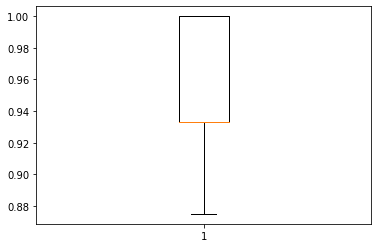

In [149]:
# Let's evaluate the model performance by using KFold and cross_val_score

scoring='recall'

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=gdb_optuna, X=X_train, y=y_train, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on the training data varies between 0.88 to 1.00

Accuracy on training set :  1.0
Accuracy on test set :  1.0
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  1.0
f1 on training set :  1.0
f1 on test set :  1.0


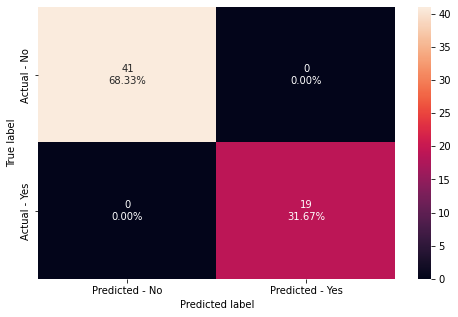

In [150]:
# Calculating different metrics
gdb_optuna_score = get_metrics_score(gdb_optuna)

# Creating confusion matrix
make_confusion_matrix(gdb_optuna, y_test)

- Model overfits training and test data.

### OPTUNA CatBoost

In [151]:
def ctb_objective(trial: Trial,X,y) -> float:
    
    param = {
        'iterations' : trial.suggest_int('iterations', 50, 300),                         
        'depth' : trial.suggest_int('depth', 4, 10),                                       
        'learning_rate':trial.suggest_float('learning_rate',1e-7,0.3, log=True),               
        'random_strength' :trial.suggest_int('random_strength', 0, 100),                       
        'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter'])
        
    }
    
    model = CatBoostClassifier(random_state = 42, verbose=False, **param)
    
    return cross_val_score(model, X, y, scoring=scorer, cv=kfold).mean()

In [152]:
optuna.logging.disable_default_handler() # to suppress the print of n_trails
ctb_study = optuna.create_study(direction='maximize', sampler=TPESampler())
ctb_study.optimize(lambda trial : ctb_objective(trial, X, y), n_trials= 100)

Trial 1 failed, because the objective function returned nan.
Trial 17 failed, because the objective function returned nan.


In [153]:
print('Best trial: score {},\nparams {}'.format(ctb_study.best_trial.value, ctb_study.best_trial.params))

Best trial: score 0.9894736842105264,
params {'iterations': 263, 'depth': 7, 'learning_rate': 0.2729843204022618, 'random_strength': 37, 'bagging_temperature': 0.014763213540312549, 'od_type': 'IncToDec'}


In [159]:
# Creating new pipeline with best parameters

ctb_optuna = make_pipeline(
    MinMaxScaler(),
    CatBoostClassifier(random_state=42, verbose=False, iterations=263, depth= 7, learning_rate= 0.273, random_strength=37, 
                       bagging_temperature=0.15, od_type='IncToDec'))

# Fit the model on training data
ctb_optuna.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x7fda3ffbb3d0>)])

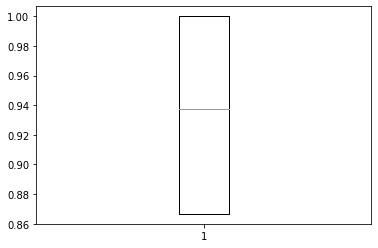

In [155]:
# Let's evaluate the model performance by using KFold and cross_val_score

scoring='recall'

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=ctb_optuna, X=X_train, y=y_train, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on training data varies between 0.86 to 1.00

Accuracy on training set :  1.0
Accuracy on test set :  0.9833333333333333
Recall on training set :  1.0
Recall on test set :  0.9473684210526315
Precision on training set :  1.0
Precision on test set :  1.0
f1 on training set :  1.0
f1 on test set :  0.972972972972973


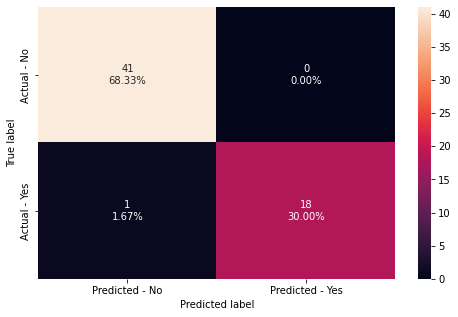

In [160]:
# Calculating different metrics
ctb_optuna_score = get_metrics_score(ctb_optuna)

# Creating confusion matrix
make_confusion_matrix(ctb_optuna, y_test)

- Training model overfits.

### OPTUNA SVM

In [161]:
def svm_objective(trial: Trial,X,y) -> float:
    
    param = {
        'kernel': trial.suggest_categorical('kernel',['rbf','poly','linear','sigmoid']),
        'C': trial.suggest_float("C",0.1,3.0,log=True),
        'gamma': trial.suggest_categorical('gamma',['auto','scale']),
        'degree': trial.suggest_int("degree",1,3,log=True)
        
    }
    
    model = svm.SVC(random_state = 42, class_weight='balanced', probability=True, max_iter=1000, verbose=False, **param)
    
    return cross_val_score(model, X, y, scoring=scorer, cv=kfold).mean()

In [163]:
optuna.logging.disable_default_handler() # to suppress the print of n_trails
svm_study = optuna.create_study(direction='maximize', sampler=TPESampler())
svm_study.optimize(lambda trial : svm_objective(trial, X, y), n_trials= 100)

In [ ]:
print('Best trial: score {},\nparams {}'.format(svm_study.best_trial.value, svm_study.best_trial.params))

Best trial: score 1.0,
params {'kernel': 'sigmoid', 'C': 0.11393526179464793, 'gamma': 'auto', 'degree': 1}


In [164]:
# Creating new pipeline with best parameters

svm_optuna = make_pipeline(
    MinMaxScaler(),
    svm.SVC(random_state=42, class_weight='balanced', probability=True, max_iter=1000, kernel='sigmoid',  C=0.114, gamma= 'auto', 
           degree=1))

# Fit the model on training data
svm_optuna.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svc',
                 SVC(C=0.114, class_weight='balanced', degree=1, gamma='auto',
                     kernel='sigmoid', max_iter=1000, probability=True,
                     random_state=42))])

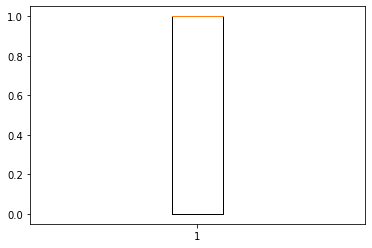

In [165]:
# Let's evaluate the model performance by using KFold and cross_val_score

scoring='recall'

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=svm_optuna, X=X_train, y=y_train, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on training data varies between 0 to 1

Accuracy on training set :  0.6778242677824268
Accuracy on test set :  0.6833333333333333
Recall on training set :  0.0
Recall on test set :  0.0
Precision on training set :  0.0
Precision on test set :  0.0
f1 on training set :  0.0
f1 on test set :  0.0


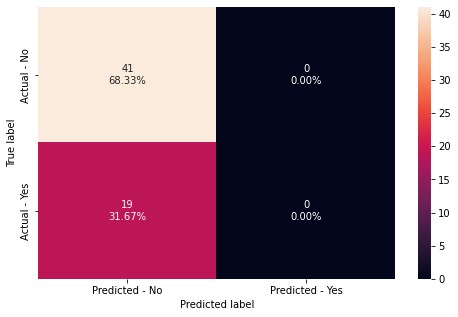

In [166]:
# Calculating different metrics
svm_optuna_score = get_metrics_score(svm_optuna)

# Creating confusion matrix
make_confusion_matrix(svm_optuna, y_test)

- Model performed very poorly

### OPTUA SGD Classifier

In [167]:
def sgd_objective(trial: Trial,X,y) -> float:
    
    param = {
        'loss':trial.suggest_categorical('loss', ['hinge', 'log', 'modified_huber', 'perceptron', 'squared_hinge']),
        'penalty':trial.suggest_categorical("penalty", ['l2','l1', 'elasticnet']),
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e0)
        }
    
    model = SGDClassifier(random_state = 42, class_weight= 'balanced', verbose=False, n_jobs=-1, **param)    
    return cross_val_score(model, X, y, scoring=scorer, cv=kfold).mean()

In [168]:
optuna.logging.disable_default_handler() # to suppress the print of n_trails
sgd_study = optuna.create_study(direction='maximize', sampler=TPESampler())
sgd_study.optimize(lambda trial : sgd_objective(trial, X, y), n_trials= 100)

In [ ]:
print('Best trial: score {},\nparams {}'.format(sgd_study.best_trial.value, sgd_study.best_trial.params))

Best trial: score 1.0,
params {'loss': 'squared_hinge', 'penalty': 'l1', 'alpha': 6.826712756972688e-05}


In [172]:
# Creating new pipeline with best parameters

sgd_optuna = make_pipeline(
    MinMaxScaler(),
    SGDClassifier(random_state=42, class_weight='balanced', max_iter=1000, verbose=False, loss='squared_hinge', penalty='l1',
                 alpha=6.826712756972688e-05))

# Fit the model on training data
sgd_optuna.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('sgdclassifier',
                 SGDClassifier(alpha=6.826712756972688e-05,
                               class_weight='balanced', loss='squared_hinge',
                               penalty='l1', random_state=42, verbose=False))])

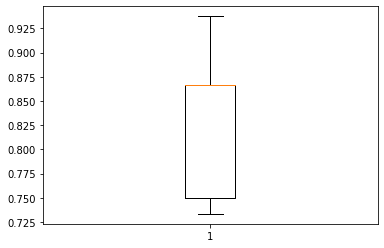

In [173]:
# Let's evaluate the model performance by using KFold and cross_val_score

scoring='recall'

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=sgd_optuna, X=X_train, y=y_train, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on the training data varies between 0.725 to 0.925

Accuracy on training set :  0.6903765690376569
Accuracy on test set :  0.6666666666666666
Recall on training set :  0.935064935064935
Recall on test set :  0.7894736842105263
Precision on training set :  0.5106382978723404
Precision on test set :  0.4838709677419355
f1 on training set :  0.6605504587155963
f1 on test set :  0.6


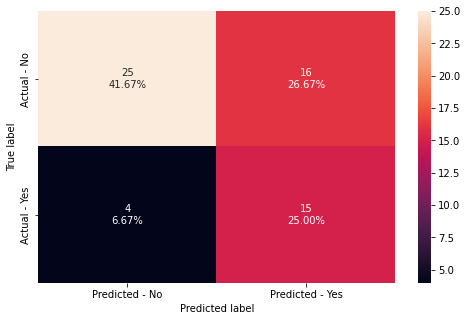

In [174]:
# Calculating different metrics
sgd_optuna_score = get_metrics_score(sgd_optuna)

# Creating confusion matrix
make_confusion_matrix(sgd_optuna, y_test)

- Decent model score, however Recall score for traning and test have significant difference.

### OPTUNA XGBoost

In [175]:
def xgb_objective(trial: Trial,X,y) -> float:
    
    param = {
                "n_estimators" : trial.suggest_int('n_estimators', 0, 1000),
                'max_depth':trial.suggest_int('max_depth', 2, 25),
                'reg_alpha':trial.suggest_int('reg_alpha', 0, 10),
                'reg_lambda':trial.suggest_int('reg_lambda', 0, 7),
                'min_child_weight':trial.suggest_int('min_child_weight', 0, 7),
                'gamma':trial.suggest_int('gamma', 0, 9),
                'learning_rate':trial.suggest_float('learning_rate',1e-7,0.3, log=True),
                'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree',0.1,1,0.01),
                'nthread' : -1
            }
    
    model = XGBClassifier(random_state = 42, eval_metric="logloss",n_jobs=-1, **param)
    
    return cross_val_score(model, X, y, scoring=scorer, cv=kfold).mean()

In [176]:
optuna.logging.disable_default_handler() # to suppress the print of n_trails
xgb_study = optuna.create_study(direction='maximize',sampler=TPESampler())
xgb_study.optimize(lambda trial : xgb_objective(trial,X,y),n_trials= 100)

In [184]:
print('Best trial: score {},\nparams {}'.format(xgb_study.best_trial.value, xgb_study.best_trial.params))

Best trial: score 0.9789473684210526,
params {'n_estimators': 301, 'max_depth': 14, 'reg_alpha': 0, 'reg_lambda': 1, 'min_child_weight': 1, 'gamma': 1, 'learning_rate': 0.11921290939272582, 'colsample_bytree': 0.61}


- Using above parameters Test recall was around 88, therefore, i have manually i amended the parameters to get slightly better recall score.

In [191]:
# Creating new pipeline with best parameters
xgb_optuna= make_pipeline(
    MinMaxScaler(),
    XGBClassifier(random_state=42, eval_metric="logloss", use_label_encoder=False,  n_estimators=675, max_depth=25, reg_alpha=0, reg_lambda=2,
                  min_child_weight=1, gamma=1, learning_rate=0.176, colsample_bytree=0.38))

# Fit the model on training data
xgb_optuna.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('xgbclassifier',
                 XGBClassifier(colsample_bytree=0.38, eval_metric='logloss',
                               gamma=1, learning_rate=0.176, max_depth=25,
                               n_estimators=675, random_state=42, reg_lambda=2,
                               use_label_encoder=False))])

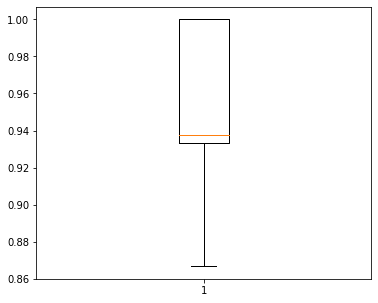

In [182]:
# Let's evaluate the model performance by using KFold and cross_val_score
# K-Folds cross-validator provides dataset indices to split data into train/validation sets. 
# Split dataset into k consecutive stratified folds (without shuffling by default).
#Each fold is then used once as validation while the k - 1 remaining folds form the training set.
scorer='recall'

kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=xgb_optuna, X=X_train, y=y_train, scoring=scorer, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(6,5))
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on the training data varies between 0.86 to 1.0

Accuracy on training set :  0.99581589958159
Accuracy on test set :  0.9333333333333333
Recall on training set :  0.987012987012987
Recall on test set :  0.8947368421052632
Precision on training set :  1.0
Precision on test set :  0.8947368421052632
f1 on training set :  0.9934640522875817
f1 on test set :  0.8947368421052632


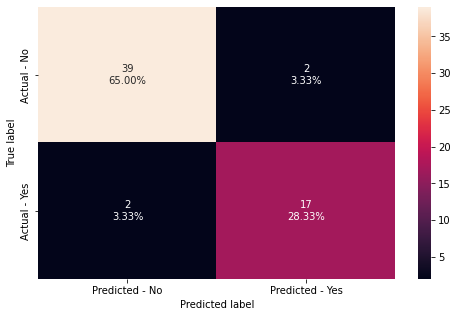

In [192]:
# Calculating different metrics
xgb_optuna_score = get_metrics_score(xgb_optuna)

# Creating confusion matrix
make_confusion_matrix(xgb_optuna, y_test)

### Models Performance

In [185]:
# defining list of models
models = [sgd_gridsearch, svm_gridsearch, ridge_gridsearch, lgbm_gridsearch, lg_gridsearch, bagging_gridsearch, rf_gridsearch,
         adb_gridsearch, gdb_gridsearch, xgboost_gridsearch, catboost_gridsearch, sgd_optuna, rf_optuna, bg_optuna, adaboost_optuna,
          gdb_optuna, ctb_optuna, svm_optuna, sgd_optuna,xgb_optuna]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False) # False is used to supress the output of all the model scores.
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [186]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            'SGD Gridsearch', 'SVM GridSearch', 'Ridge GridSearch','LGBM Gridsearch','LG Gridsearch', 'Bagging Gridsearch','RF Gridsearch',
            'ADBoost Gridsearch', 'GDBoost Gridsearch', 'XGBoost Gridsearch', 'CatBoost Gridsearch', 'SGD Optuna', 'RF Optuna', 'Bagging Optuna', 
            'ADBoost Optuna','GDBoost Optuna', 'CTBoost Optuna','SVM Optuna', 'SGD Optuna', 'XGBoost Optuna'],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test
    }
)

In [190]:
# Sorting models with highest test recall.
# comparison_frame.sort_values(by= ['Test_Recall','Test_F1','Test_Precision','Test_Accuracy'], ascending=False)
comparison_frame.sort_values('Test_Recall', ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
4,LG Gridsearch,0.322176,0.316667,1.000000,1.000000,0.322176,0.316667,0.487342,0.481013
15,GDBoost Optuna,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,SVM GridSearch,0.322176,0.316667,1.000000,1.000000,0.322176,0.316667,0.487342,0.481013
14,ADBoost Optuna,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
16,CTBoost Optuna,1.000000,0.983333,1.000000,0.947368,1.000000,1.000000,1.000000,0.972973
7,ADBoost Gridsearch,0.983264,0.900000,0.961039,0.947368,0.986667,0.782609,0.973684,0.857143
8,GDBoost Gridsearch,1.000000,0.983333,1.000000,0.947368,1.000000,1.000000,1.000000,0.972973
19,XGBoost Optuna,0.995816,0.933333,0.987013,0.894737,1.000000,0.894737,0.993464,0.894737
13,Bagging Optuna,1.000000,0.933333,1.000000,0.842105,1.000000,0.941176,1.000000,0.888889
18,SGD Optuna,0.690377,0.666667,0.935065,0.789474,0.510638,0.483871,0.660550,0.600000


- From the above models score comparision we can can observe that AdaBoost Gridsearch and XGBoost Optuna model produced overall good model score, not just recall.

### Best model confusion matrix.

In [193]:
# Positive and Negative rate confusion matrix of the best model
hardpredtst=adb_gridsearch.predict(X_test)
def conf_matrix(y_test,pred):
    ((tp, fp), (fn, tn)) = metrics.confusion_matrix(y_test, pred)
    ((tpr,fpr),(fnr,tnr))= metrics.confusion_matrix(y_test, pred, 
            normalize='true')
    return pd.DataFrame([[f'TP = {tp} (TPR = {tpr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TN = {tn} (TNR = {tnr:1.2%})']],
            index=['True 0(Patient did not die)', 'True 1(Patient died)'], 
            columns=['Pred 0(Predicted as patient will not die)', 
                            'Pred 1(Predicted as patient will die)'])
conf_matrix(y_test,hardpredtst)

,Pred 0(Predicted as patient will not die),Pred 1(Predicted as patient will die)
True 0(Patient did not die),TP = 36 (TPR = 87.80%),FP = 5 (FPR = 12.20%)
True 1(Patient died),FN = 1 (FNR = 5.26%),TN = 18 (TNR = 94.74%)


In [194]:
# predict probabilities on the best 2 models.
adb_gridsearch_pred_prob = adb_gridsearch.predict_proba(X_test)
xgb_optuna_pred_prob = xgb_optuna.predict_proba(X_test)

In [195]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, adb_gridsearch_pred_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, xgb_optuna_pred_prob[:,1], pos_label=1)

In [196]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [197]:
from sklearn.metrics import roc_auc_score
# auc scores
auc_score_adb_gridsearch_pred_prob = roc_auc_score(y_test, adb_gridsearch_pred_prob[:,1])
auc_score_xgb_optuna_pred_prob = roc_auc_score(y_test, xgb_optuna_pred_prob[:,1])

In [198]:
# print AUC ROC score for top models.
print('AdBoost GridSearch AUC ROC score is {b:.3f}'.format(b=auc_score_adb_gridsearch_pred_prob))
print('XGBoost Optuna AUC ROC score is {a:.3f}'.format(a=auc_score_xgb_optuna_pred_prob))

AdBoost GridSearch AUC ROC score is 0.987
XGBoost Optuna AUC ROC score is 0.990


- As we can observe from the above that XGBoost Optuna model able to distinguish better by 0.003 perrcent comparing to AdBoost Gridsearch mnodel. Very minor difference.

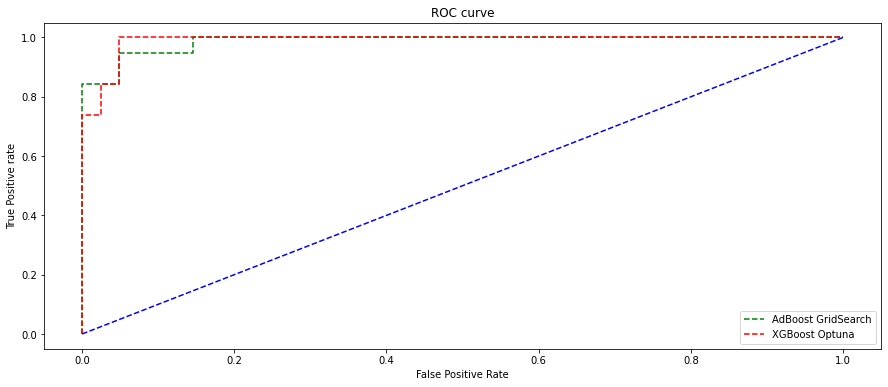

In [199]:
# Plot the AUC ROC curve for the models.

plt.figure(figsize=(15,6))
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='AdBoost GridSearch')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='XGBoost Optuna')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Feature Importance

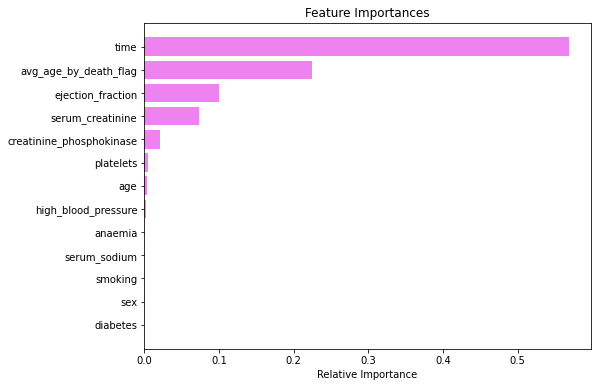

In [200]:
feature_names = X_train.columns
importances = adb_gridsearch[1].feature_importances_
#importances= np.mean([tree.feature_importances_ for tree in adb_gridsearch[1].estimators_], axis=0)

indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- From the above we can observe that Time, ave age by death flag, ejection fraction, and so on  are the important factors to determine the death event flag. Whereas diabetes, sex, smoking and so on are the least important factos to determine the death event flag.

# Business Recomendations.
- More care is to be taken for the aged patients, as we have observed in our EDA that we have a higher proportion of death rate for age patients.
- Lesser ejection fraction causes more deaths than higher ejection fraction. When the ejection fraction decreases, ensure extra care is taken and consult doctors.
- Serum creatinine has to be low; higher Serum creatinine leads to more death. When the Serum creatinine increases patient consult the doctor.
- Time: We can observe the average time of the patient when the death flag is Yes is 55. This indicates that the lower the time, the higher the death. However, we are unsure what the time feature suggests, so it is difficult to ascertain.
- From the EDA, we have observed that Male have slightly higher death than females. So male patients should be extra careful monitoring if any of the features above increase or decrease and consult the doctor simultaneously. In addition, the hospital follows up with Male patients regularly to ensure they are in good health and ask them to visit the hospital to get the medical report frequently.
- High blood pressure should be regularly checked, even though it is not an essential factor for death events, but we have observed that in the EDA that higher blood pressure leads to a marginal increase in death events.